# CLUSTER ANALYSIS ON NBA STATISTICS
---
<br></br>
### Madison Dimaculangan
#### April 2020
<center><img src='top-view-photo-of-basketball-court-2291004_rotated_resized2.jpg'> </center>
<center>Photo by sergio souza from Pexels</center>

# TABLE OF CONTENTS
---
## 01 Introduction
## 02 Dataset
## 03 Model Preparation
## 04 Clustering Execution
## 05 Clusters Evaluation
## 06 Final Thoughts

# 01 INTRODUCTION
---
<center><img src='sport-basketball-basket-sports-field-41433_resized.jpg'> </center>
<center>Photo by Wopke from Pexels</center>

## Topics


<br></br>
### NBA
- The National Basketball Association is a professional men's basketball league with 29 teams in the United States and 1 team in Canada.
- The NBA held its inaugural season in 1946, and was in the midst of its 74th season before suspension due to the coronavirus pandemic.

<br></br>
### Clustering
- Also known as `cluster analysis`, this is the process of dividing a set of objects or observations into groups called `clusters`.
- The goal of clustering is to sort observations such that the observations within a cluster are more similar to one another than observations in another cluster.
- Cluster analysis is one of the methods of unsupervised learning, a type of machine learning that searches for patterns in a dataset with no labels.

<br></br>
### Goal
- The goal of cluster analysis for the NBA dataset is to segment the player statistics such that we are able to identify tiers of performance in order to answer such subjective questions as:
 - Which NBA seasons (years) are the greatest of all time?
 - Which are the greatest NBA players of all time?

## Dataset

<br></br>
### Source
The dataset is a merger of two sets of player performance statistics from [Basketball Reference](https://www.basketball-reference.com/).
1. Data from 1950-2017 was downloaded from [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats), uploaded by Omri Goldstein (username: drgilermo)
2. Data from 2018-2019 was sourced directly from Basketball Reference.

<br></br>
### Features & Observations
- The dataset containts 25,694 observations (after dropping blank rows)
- The datatset contains 50 columns (after dropping blank columns)
 - 13 columns have ~11-15% of observations missing (NULL)
 - 7 additional columns have ~19-36% of observations missing (NULL)

# SETUP
---

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# clustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

print('--- packages imported ---')

--- packages imported ---


## Set Plot Style

In [2]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to set plot style if no arguments provided
jtplot.style()

print('--- jtplot.style() initialized    --')
print('--- theme plot style will be used ---')

--- jtplot.style() initialized    --
--- theme plot style will be used ---


## Define Constants

In [3]:
RUN_NORM = False
SAVE_BACKUPS = False

RUN_NORM2 = False
SAVE_BACKUPS2 = False

FAV_PLAYER = 'Hakeem Olajuwon'
COLORS = ["r","g","y","m","w","b","c","limegreen",'tab:orange','tab:pink','tab:cyan','tab:olive','tab:green','tab:blue','tab:red','tab:purple']

VERBOSE=False

print('--- constants initialized ---')

--- constants initialized ---


## Load Dataset

In [4]:
df = pd.read_csv('Seasons_Stats_1950-2019.csv')

print('--- dataset loaded | dataframe initialized ---')
df.head()

--- dataset loaded | dataframe initialized ---


Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

# 03 MODEL PREPARATION
---
## Data Cleaning
## Data Exploration
## Feature Engineering

## Data Cleaning
<center><img src='abstract-art-blur-bright-373543_resized.jpg'> </center>
<center>Photo by Pixabay from Pexels</center>

### Data Cleaning: Removing Blank Columns
- There are 3 blank columns (`Unnamed: 0`, `blanl`, `blank2`) that appear to serve no purpose, so they will be removed.

In [5]:
# drop blank column
df = df.drop(['Unnamed: 0','blanl','blank2'], axis=1)

### Data Cleaning: Replacing Non-Standard Characters
- The larger dataset (from Kaggle) had already been cleaned of accented letters and replaced with standard characters.
- The dataset collected directly from Basketball Reference requires this additional step.

In [6]:
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'
ascii_uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
ascii_letters = ascii_lowercase + ascii_uppercase
char_list = ascii_letters + ' .-\''

player_list = sorted(list(df.Player.dropna().unique()))

In [7]:
for player in player_list:
    for char in player:
        if char not in char_list:
            print(player)
            break

Ante Žiži?
Cristiano Felício
D?vis Bert?ns
Dairis Bert?ns
Dennis Schröder
Donatas Motiej?nas
Džanan Musa
Ersan ?lyasova
Jakob Pöltl
Jonas Valan?i?nas
José Calderón
Juan Hernangómez
Kristaps Porzi??is
Manu Ginóbili
Miloš Teodosi?
Mirza Teletovi?
Nenê Hilário
Nenę Hilário
Nicolás Brussino
Skal Labissière
Skal Labissičre
Timothé Luwawu-Cabarrot
Tomáš Satoranský
Willy Hernangómez
Álex Abrines
Ángel Delgado
Ömer A??k


In [8]:
# replace with unaccented 'a'
df.Player = df.Player.str.replace('á', 'a')
df.Player = df.Player.str.replace('Á', 'A')

# replace with unaccented 'c'
df.Player = df.Player.str.replace('č', 'c')

# replace with unaccented 'e'
df.Player = df.Player.str.replace('è', 'e')
df.Player = df.Player.str.replace('é', 'e')
df.Player = df.Player.str.replace('ê', 'e')
df.Player = df.Player.str.replace('ę', 'e')

# replace with unaccented 'i'
df.Player = df.Player.str.replace('í', 'i')

# replace with unaccented 'o'
df.Player = df.Player.str.replace('ö', 'o')
df.Player = df.Player.str.replace('Ö', 'O')
df.Player = df.Player.str.replace('ó', 'o')

# replace with unaccented 'o'
df.Player = df.Player.str.replace('š', 's')

# replace with unaccented 'y'
df.Player = df.Player.str.replace('ý', 'y')

# replace with unaccented 'z'
df.Player = df.Player.str.replace('ž', 'z')
df.Player = df.Player.str.replace('Ž', 'Z')

# other replacements
df.Player = df.Player.str.replace('Ante Zizi\?', 'Ante Zizic')
df.Player = df.Player.str.replace('D\?vis Bert\?ns', 'Davis Bertans')
df.Player = df.Player.str.replace('Dairis Bert\?ns', 'Dairis Bertans')
df.Player = df.Player.str.replace('Donatas Motiej\?nas', 'Donatas Motiejunas')
df.Player = df.Player.str.replace('Ersan \?lyasova', 'Ersan Ilyasova')
df.Player = df.Player.str.replace('Jonas Valan\?i\?nas', 'Jonas Valanciunas')
df.Player = df.Player.str.replace('Kristaps Porzi\?\?is', 'Kristaps Porzingis')
df.Player = df.Player.str.replace('Milos Teodosi\?', 'Milos Teodosic')
df.Player = df.Player.str.replace('Mirza Teletovi\?', 'Mirza Teletovic')
df.Player = df.Player.str.replace('Omer A\?\?k', 'Omer Asik')

### Data Cleaning: Dealling With Missing Values
- 20 of the 50 original variables consisted of at least 11% NULL values.
- These variables coincide with player statistics that were not collected or calculated in the earlier years of the NBA.
- These will not be removed or interpolated as they may be effective in clustering, especially for later years.

In [9]:
df_missing = pd.concat([df.isnull().sum().sort_values(ascending=False), (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100], axis=1)
df_missing = df_missing.reset_index()
df_missing.columns = ['Stat','Count','Percent']
df_missing[df_missing.Count > 0].head()

Stat  Count    Percent
0   3P%   9360  36.333993
1    GS   6458  25.068903
2  3PAr   5859  22.743682
3   3PA   5764  22.374908
4    3P   5764  22.374908

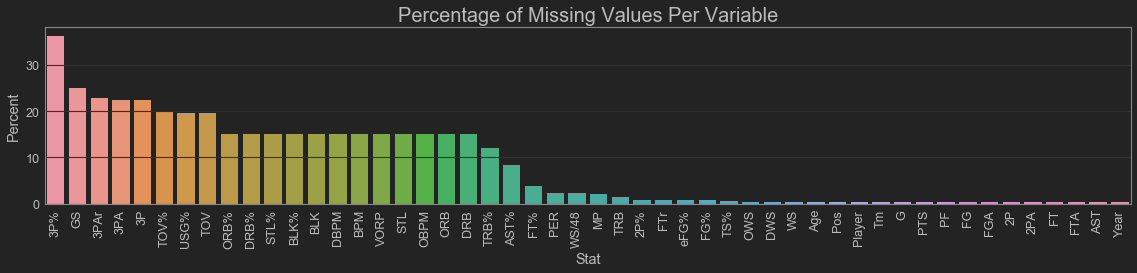

In [10]:
plt.rcParams['figure.figsize'] = (16,4)

sns.barplot(data=df_missing, x='Stat', y='Percent')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values Per Variable', fontsize=20)

plt.tight_layout()
plt.show()

### Data Cleaning: Removing Blank Rows
- Inspecting NULL values for the Year variable highlighted 67 blank rows.
- These will be dropped from the dataframe, as they do not impact analysis.

In [11]:
df[df.Year.isnull()].shape

(67, 50)

In [12]:
print(f'--- df.shape before: {df.shape} ---')

drop_indexes = df[df.Year.isnull()].index
df = df.drop(index=drop_indexes).reset_index()
df = df.drop(['index'], axis=1)
#df[df.Year.isnull()].head()

print(f'--- df.shape after: {df.shape}  ---')

--- df.shape before: (25761, 50) ---
--- df.shape after: (25694, 50)  ---


### Data Cleaning: Variable Sorting
- Of the 50 original variables, 46 are continuous, as they are player performance statistics and ratings.
- The remaining 4 (Player, Pos, Tm, and Year) are categorical and will be converted to String as necessary (e.g.: Year).

In [13]:
# create list of continuous variables
cont_vars = df.select_dtypes(exclude='object').columns.to_list()
print('continuous variables\n', cont_vars)

print('')

# create list of categorical variables
cat_vars = df.select_dtypes(include='object').columns.to_list()
print('categorical variables\n', cat_vars)

continuous variables
 ['Year', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

categorical variables
 ['Player', 'Pos', 'Tm']


### convert numeric categorical variables

In [14]:
# convert Year values to String
df.Year = df.Year.astype(int)
df.Year = df.Year.astype(str)

# move Year variable from continuous list to categorical list
cont_vars.remove('Year')
cat_vars = df.select_dtypes(include='object').columns.to_list()

# sanity check
print(cont_vars)
print('')
print(cat_vars)

['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

['Year', 'Player', 'Pos', 'Tm']


## Data Exploration
<center><img src='analytics-blur-close-up-commerce-590020_resized.jpg'> </center>
<center>Photo by Lukas from Pexels</center>

### Data Exploration: Number of Players Per Year
- The number of player has increased steadily since the league's inception, with over 500 players as of the 2019 season.

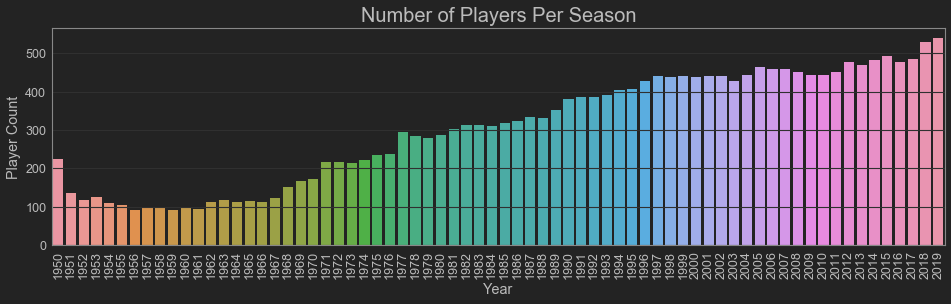

In [15]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(df.Year.unique(), df.groupby('Year').Player.nunique())
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Player Count')
plt.title('Number of Players Per Season', fontsize=20)
plt.show()

### Data Exploration: Number of Players Per Position | Grouping Positions
- There are two commonly accepted position groups: BackCourt (Guards) and FrontCourt (Forwards, Centers).
- The dataset includes many combinatory positions (see plot below).
- To simplify, Pos variable will be grouped into BackCourt and FrontCourt, generating a new variable, PosGrp

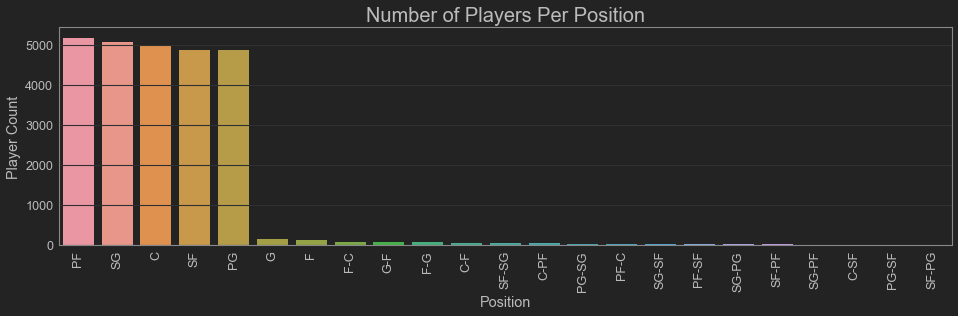

In [16]:
df_Pos = pd.DataFrame(df.Pos.value_counts()).reset_index()
df_Pos.columns = ['Position','Count']

plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(df_Pos.Position, df_Pos.Count)
plt.xticks(rotation=90)
plt.xlabel('Position')
plt.ylabel('Player Count')
plt.title('Number of Players Per Position', fontsize=20)
plt.show()

In [17]:
def group_positions(x):
    if x in ['G-F','SG','G','PG','SG-SF','SG-PG','PG-SG','PG-SF','SG-PF']:
        return 'BackCourt'
    else:
        return 'FrontCourt'

df['PosGrp'] = df.Pos.apply(group_positions)

df.PosGrp.value_counts()

FrontCourt    15450
BackCourt     10244
Name: PosGrp, dtype: int64

### Data Exploration: Basic Metrics - These are the basic performance metrics for players in the NBA. They are simply counted and recorded.
- There is generally a positive trend between the 5 basic metrics.
- BLK (blocks) appears to correlate the least with the other metrics.
- BackCourt players appear to record more assists (AST) and steals (STL) than FrontCourt players.
- FrontCourt players appear to collect more rebounds (TRB) and blocks (BLK) than BackCourt players.

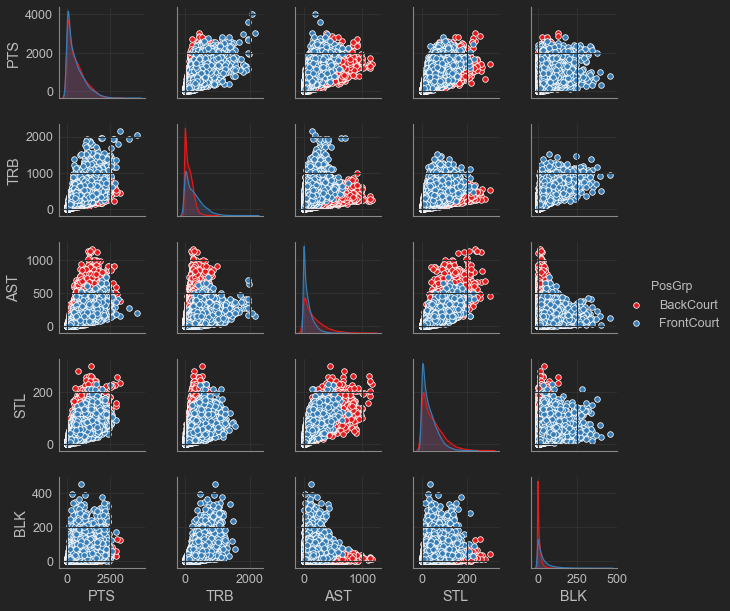

In [18]:
df_pp = df[['PTS','TRB','AST','STL','BLK','PosGrp']]
sns.pairplot(df_pp, hue='PosGrp', palette='Set1', height=1.75)
plt.show()

### Data Exploration: Shooting Percentages - These are the various shooting percentages (shots made divided by shot attempts)
- There is generally a positive trend between the various shooting percentages.
- FT% (free-throw percentage) appears to correlate the least with the others.
- BackCourt players appear to have higher FT%, while FrontCourt players have slightly higher FG%.

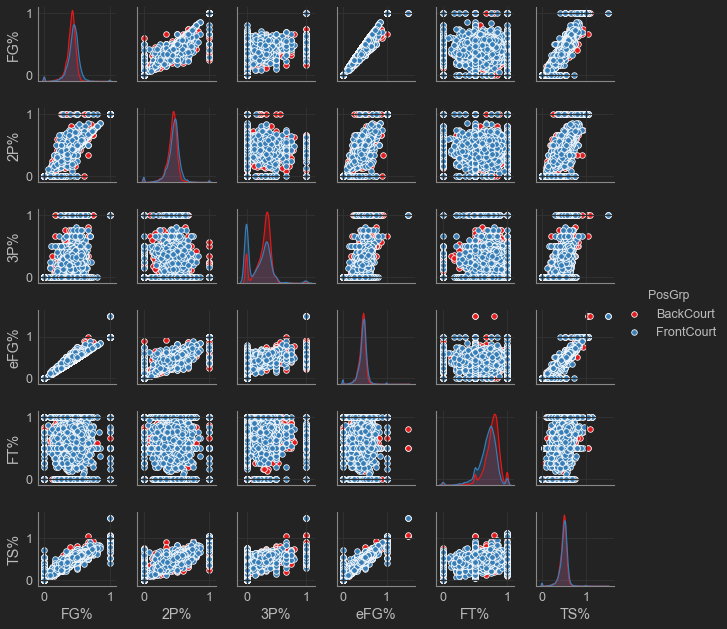

In [19]:
df_pp = df[['FG%','2P%','3P%','eFG%','FT%','TS%','PosGrp']]
sns.pairplot(df_pp, hue='PosGrp', palette='Set1', height=1.5)
plt.show()

### Data Exploration: Win Shares - This is the estimated number of wins contributed by a player.
- There is generally a positive trend between WS and its offensive (OWS) and defensive (DWS) components.
- WS appears to correlate better with the offensive component (OWS) than the defensive component (DWS).
- There is no indication that FrontCourt and BackCourt players perform differently with respect to WS.

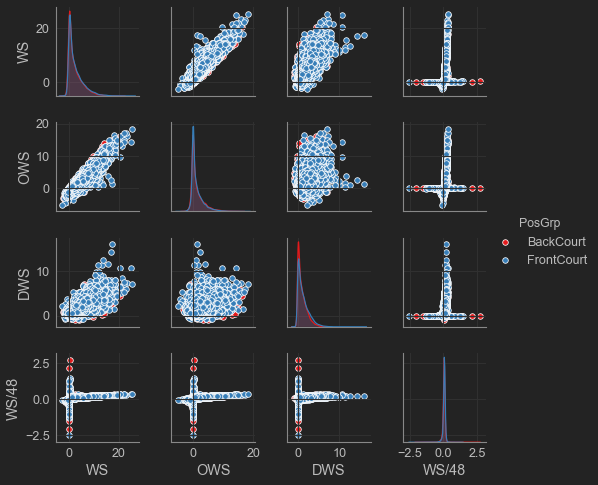

In [20]:
df_pp = df[['WS','OWS','DWS','WS/48','PosGrp']]
sns.pairplot(df_pp, hue='PosGrp', palette='Set1', height=1.75)
plt.show()

### Notes: Player Ratings Definitions
- `BPM` - Box Plus/Minus, this is an estimate of the points per 100 possessions contributed above an average player
 - `OBPM` - the offensive component of BPM
 - `DBPM` - the defensive component of BPM
- `VORP` - Value Over Replacement Player, this is an estimate of the points per 100 possessions contributed above a replacement player (BPM = -2.0)
- `PER` - Player Efficiency Rating, this is a per-minute summation of all of a player's positive and negative accomplishments

### Data Exploration: Player Ratings - These are advanced performance metrics.
- BPM correlates well with its offensive component OBPM, VORP, and PER.
- FrontCourt players appear to have a slight edge in DBPM over BackCourt players.
- DBPM does not correlate well with the other variables.

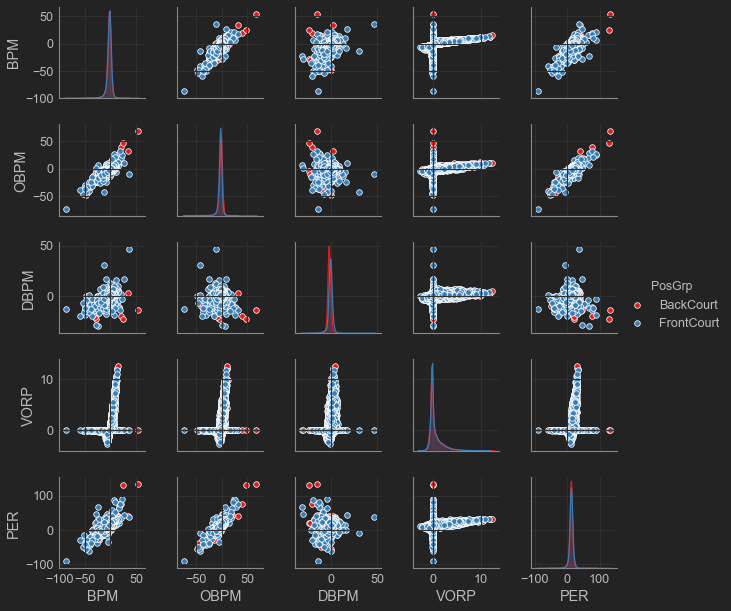

In [21]:
df_pp = df[['BPM','OBPM','DBPM','VORP','PER','PosGrp']]
sns.pairplot(df_pp, hue='PosGrp', palette='Set1', height=1.75)
plt.show()

### Data Exploration: Normalizing Continuous Variables
- The player performance metrics have a variety of ranges (e.g.: PTS: 0-2500 vs. STL: 0-300)

<br></br>
- To compare them on an even scale, the continuous variables will be normalized in two ways:
 1. Normalized against each season's max value (across all players)
 2. Normalized against each player's max value (across all years)

<br></br>
- These two sets of normalizations will then be averaged to generate additional features:
 1. SsnScr - the average of all variables normalized against the season's max ("Season Score")
 2. CareerScr - the average of all variables normalized against the player's max ("Career Score")

<br></br>
- Finally, to avoid negative values confusing the analysis, the following variables will be excluded from normalization:
 - ['PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [22]:
df_mins = df[cont_vars].min().to_frame().reset_index()
df_mins.columns = ['variable','var_min']
normalization_exclude_list = df_mins[df_mins.var_min < 0].variable.to_list()
normalization_exclude_list

['PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

#### normalize player statitistics against the season max

In [23]:
# exclude variables with negative observations
cont_vars2 = cont_vars.copy()
for var in normalization_exclude_list:
    cont_vars2.remove(var)

cont_vars2.remove('Age')
cont_vars2.remove('TOV')
cont_vars2.remove('TOV%')
cont_vars2.remove('PF')

if RUN_NORM:
    # iterate through the continuous variables
    for var in cont_vars2:
        # temporary data frame holding the yearly max value for each statistic
        df_tmp = df.groupby('Year').aggregate('max')[var].reset_index()
        # normalize each statitistical value by dividing by the max value of that statistical category for that year
        df[var + '_norm'] = df[var] / df.Year.apply(lambda x: df_tmp.loc[df_tmp.Year == x][var].iloc[0])
    
    # save to csv to save compute time in future runs
    df.to_csv('Seasons_Stats_1950-2019_normalized.csv', index=False)

else:
    df = pd.read_csv('Seasons_Stats_1950-2019_normalized.csv')

df.head()

Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%  ...  \
0  1950  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368  ...   
1  1950     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN  0.435  ...   
2  1950    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394  ...   
3  1950       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN  0.312  ...   
4  1950       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN  0.308  ...   

   DRB_norm2  TRB_norm2  AST_norm2  STL_norm2  BLK_norm2  TOV_norm2  PF_norm2  \
0        NaN        NaN   1.000000        NaN        NaN        NaN  1.000000   
1        NaN        NaN   0.947826        NaN        NaN        NaN  1.000000   
2        NaN        NaN   0.505415        NaN        NaN        NaN  0.881303   
3        NaN        NaN   1.000000        NaN        NaN        NaN  0.556927   
4        NaN        NaN   1.000000        NaN        NaN        NaN  0.518519   

   PTS_norm2  CareerScr  CareerScr_norm  
0   1.000000   0.979283        1.000000  
1   1.000000   0.988188        1.000000  
2   0.452947   0.691482        0.698473  
3   0.875000   0.872614        0.948131  
4   0.819444   0.836790        0.909207  

[5 rows x 128 columns]

#### create new features: SsnScr, SsnScr_norm
- SsnScr = mean of all normalized variables *\_norm
- SsnScr_norm = SsnScr normalized against each year's max value

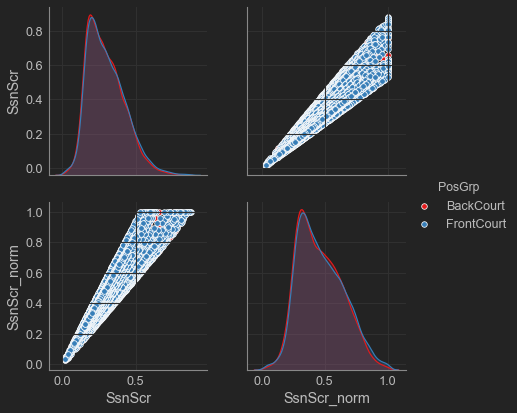

In [24]:
# generate list of normalized variables
cont_vars_norm = cont_vars2.copy()
for i in range(len(cont_vars_norm)):
    cont_vars_norm[i] = cont_vars_norm[i] + '_norm'
    
if RUN_NORM:
    # generate season score by averaging the normalized values of the statistical categories
    df['SsnScr'] = df[cont_vars_norm].mean(axis=1)

    # temporary data frame holding the yearly max value for season score
    df_tmp = df.groupby('Year').aggregate('max').SsnScr.reset_index()

    # normalize the season scores by dividing each season score by that year's maximum season score
    df['SsnScr_norm'] = df.SsnScr / df.Year.apply(lambda x: df_tmp.loc[df_tmp.Year == x].SsnScr.iloc[0])

    # save to csv to save compute time in future runs
    df.to_csv('Seasons_Stats_1950-2019_normalized.csv', index=False)
else:
    df = pd.read_csv('Seasons_Stats_1950-2019_normalized.csv')

df['PosGrp'] = df.Pos.apply(group_positions)
df.Year = df.Year.astype(str)
    
sns.pairplot(data=df, vars=['SsnScr', 'SsnScr_norm'], hue='PosGrp', palette='Set1', height=3)
plt.show()

### Data Exploration: Using season-normalized statistics to visualize a season's top players

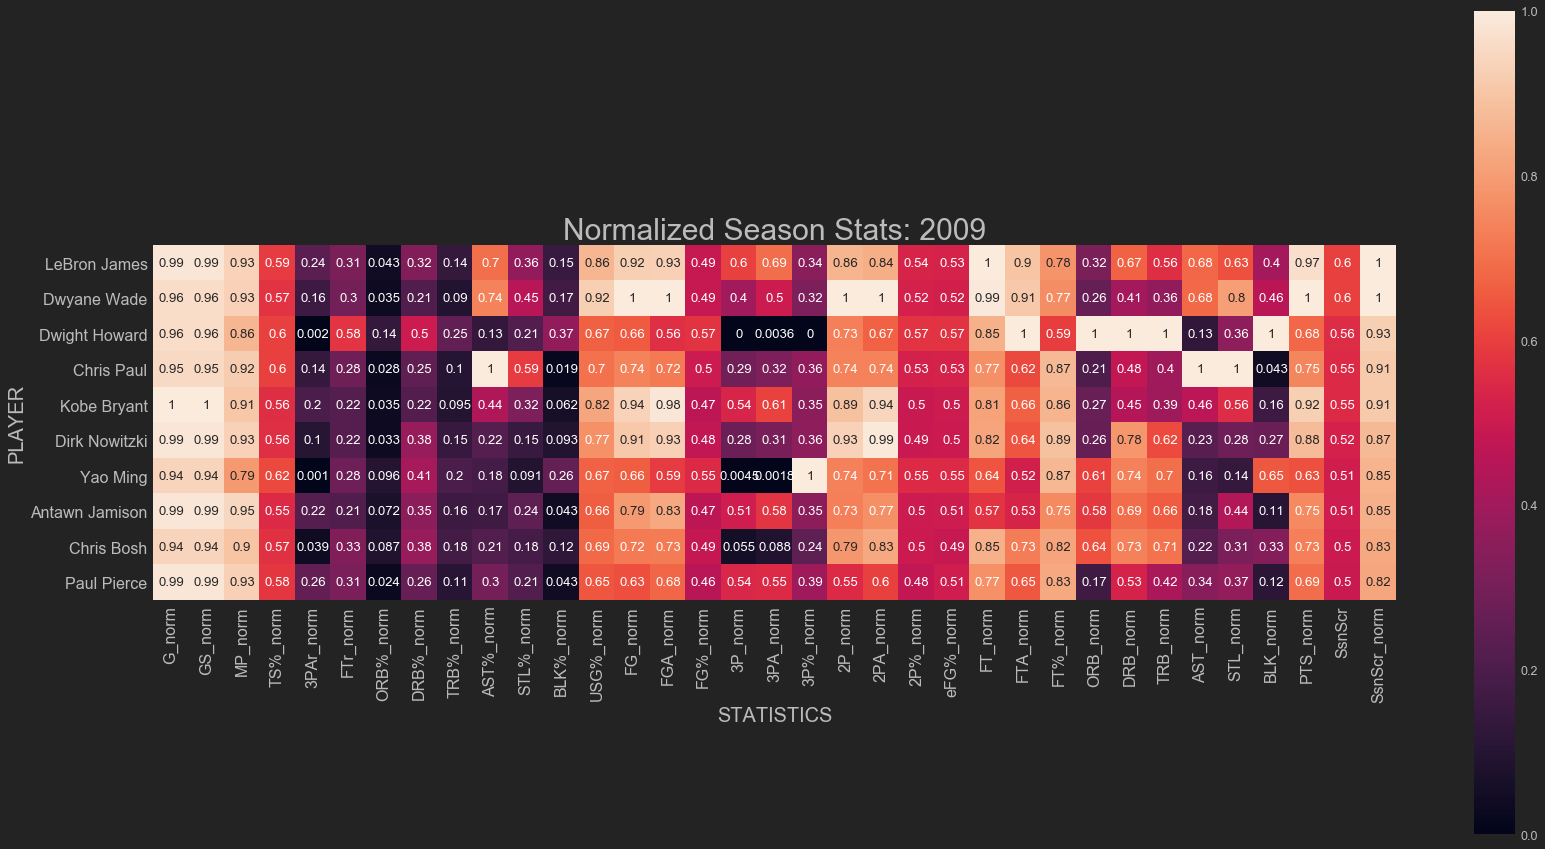

In [25]:
def plot_heatmap_season(year='1997',num_players=15):
    plt.rcParams["figure.figsize"] = (24,12)

    sns.heatmap(df[df['Year'] == year].set_index('Player')[cont_vars_norm+['SsnScr','SsnScr_norm']].sort_values(by=['SsnScr_norm'], ascending=False).head(num_players), square=True, annot=True)#, linewidth=0.5)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(rotation=0,fontsize=16)
    plt.xlabel('STATISTICS',fontsize=20)
    plt.ylabel('PLAYER',fontsize=20)

    plt.title(f'Normalized Season Stats: {year}', fontsize=30)

    plt.tight_layout()
    plt.show()

plot_heatmap_season('2009',10)

#### correlation with SsnScr_norm

In [26]:
pd.DataFrame(df[cont_vars_norm+['SsnScr_norm']].corrwith(df.SsnScr_norm).sort_values(ascending=False))

0
SsnScr_norm  1.000000
MP_norm      0.950563
PTS_norm     0.938505
FG_norm      0.931031
FGA_norm     0.926430
2PA_norm     0.914681
2P_norm      0.913601
FTA_norm     0.884169
FT_norm      0.873404
DRB_norm     0.844597
GS_norm      0.841832
G_norm       0.820689
TRB_norm     0.818613
STL_norm     0.811493
ORB_norm     0.716672
AST_norm     0.711698
BLK_norm     0.568320
3PA_norm     0.518421
3P_norm      0.494107
TS%_norm     0.419992
FG%_norm     0.391052
eFG%_norm    0.381675
2P%_norm     0.380273
USG%_norm    0.293818
AST%_norm    0.273739
FT%_norm     0.269247
DRB%_norm    0.189441
TRB%_norm    0.143822
FTr_norm     0.134413
BLK%_norm    0.121040
STL%_norm    0.118052
3P%_norm     0.101165
ORB%_norm    0.059626
3PAr_norm   -0.034501

In [27]:
pd.DataFrame(df[normalization_exclude_list].corrwith(df.SsnScr_norm).sort_values(ascending=False))

0
WS     0.857690
DWS    0.799748
OWS    0.754480
VORP   0.734024
BPM    0.662729
OBPM   0.629312
PER    0.625517
WS/48  0.508067
DBPM   0.319237

#### normalize player statistics against the career max

In [28]:
if RUN_NORM2:
    # iterate through the continuous variables
    for var in cont_vars2:
            # temporary data frame holding the yearly max value for each statistic
            df_tmp = df.groupby('Player').aggregate('max')[var].reset_index()
            # normalize each statitistical value by dividing by the max value of that statistical category for that year
            df[var + '_norm2'] = df[var] / df.Player.apply(lambda x: df_tmp.loc[df_tmp.Player == x][var].iloc[0])
            
    # save to csv to save compute time in future runs
    df.to_csv('Seasons_Stats_1950-2019_normalized.csv', index=False)

else:
    df = pd.read_csv('Seasons_Stats_1950-2019_normalized.csv')

df.head()

Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%  ...  \
0  1950  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368  ...   
1  1950     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN  0.435  ...   
2  1950    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394  ...   
3  1950       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN  0.312  ...   
4  1950       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN  0.308  ...   

   DRB_norm2  TRB_norm2  AST_norm2  STL_norm2  BLK_norm2  TOV_norm2  PF_norm2  \
0        NaN        NaN   1.000000        NaN        NaN        NaN  1.000000   
1        NaN        NaN   0.947826        NaN        NaN        NaN  1.000000   
2        NaN        NaN   0.505415        NaN        NaN        NaN  0.881303   
3        NaN        NaN   1.000000        NaN        NaN        NaN  0.556927   
4        NaN        NaN   1.000000        NaN        NaN        NaN  0.518519   

   PTS_norm2  CareerScr  CareerScr_norm  
0   1.000000   0.979283        1.000000  
1   1.000000   0.988188        1.000000  
2   0.452947   0.691482        0.698473  
3   0.875000   0.872614        0.948131  
4   0.819444   0.836790        0.909207  

[5 rows x 128 columns]

#### create new features: CareerScr, CareerScr_norm
- CareerScr = mean of all normalized variables *\_norm2
- CareerScr_norm = SsnScr normalized against each player's max value

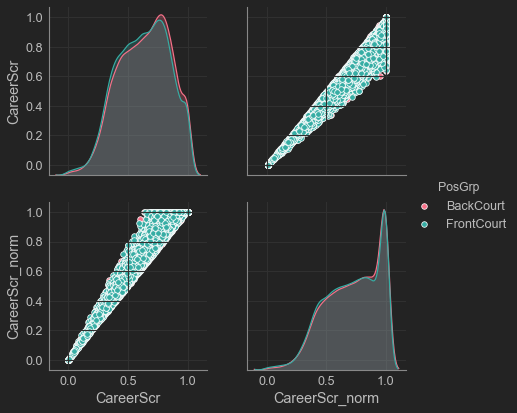

In [29]:
# generate list of normalized variables
cont_vars_norm2 = cont_vars2.copy()
for i in range(len(cont_vars_norm2)):
    cont_vars_norm2[i] = cont_vars_norm2[i] + '_norm2'

if RUN_NORM2:
    # generate season score by averaging the normalized values of the statistical categories
    df['CareerScr'] = df[cont_vars_norm2].mean(axis=1)

    # temporary data frame holding the yearly max value for season score
    df_tmp = df.groupby('Player').aggregate('max').CareerScr.reset_index()

    # normalize the season scores by dividing each season score by that year's maximum season score
    df['CareerScr_norm'] = df.CareerScr / df.Player.apply(lambda x: df_tmp.loc[df_tmp.Player == x].CareerScr.iloc[0])

    # save to csv to save compute time in future runs
    df.to_csv('Seasons_Stats_1950-2019_normalized.csv', index=False)

else:
    df = pd.read_csv('Seasons_Stats_1950-2019_normalized.csv')

df['PosGrp'] = df.Pos.apply(group_positions)
df.Year = df.Year.astype(str)
    
sns.pairplot(data=df, vars=['CareerScr', 'CareerScr_norm'], hue='PosGrp', palette='husl', height=3)
plt.show()

### Data Exploration: Using career-normalized statistics to visualize a player's career

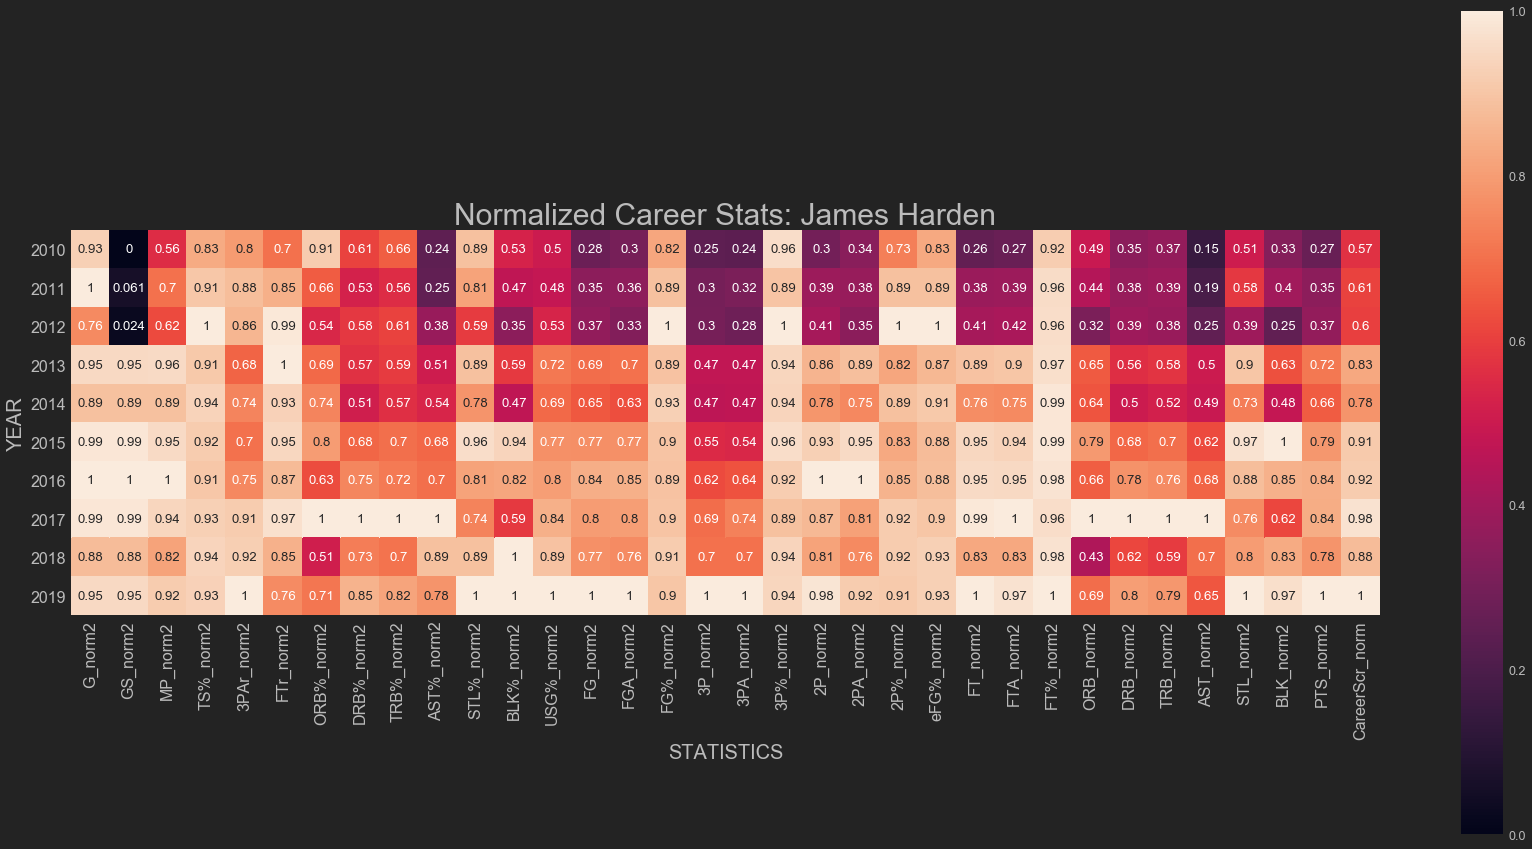

In [30]:
def plot_heatmap_player(player):
    plt.rcParams["figure.figsize"] = (24,12)

    sns.heatmap(df.sort_values(by=['Year'])[df['Player'] == player].set_index('Year')[cont_vars_norm2+['CareerScr_norm']], square=True, annot=True)#, linewidth=0.5)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(rotation=0,fontsize=16)
    plt.xlabel('STATISTICS',fontsize=20)
    plt.ylabel('YEAR',fontsize=20)

    plt.title(f'Normalized Career Stats: {player}', fontsize=30)

    plt.tight_layout()
    plt.show()

plot_heatmap_player('James Harden')

#### correlation with CareerScr_norm

In [31]:
pd.DataFrame(df[cont_vars_norm2].corrwith(df.CareerScr_norm).sort_values(ascending=False))

0
PTS_norm2   0.960498
FG_norm2    0.954628
FGA_norm2   0.951282
MP_norm2    0.947425
TRB_norm2   0.939495
2P_norm2    0.937294
2PA_norm2   0.933476
DRB_norm2   0.928280
FTA_norm2   0.913071
FT_norm2    0.908506
STL_norm2   0.898572
AST_norm2   0.895696
ORB_norm2   0.887557
G_norm2     0.860788
BLK_norm2   0.819219
GS_norm2    0.704800
3PA_norm2   0.665137
3P_norm2    0.615760
TS%_norm2   0.513294
FG%_norm2   0.500210
eFG%_norm2  0.498183
2P%_norm2   0.468752
AST%_norm2  0.376619
BLK%_norm2  0.352560
STL%_norm2  0.338445
FT%_norm2   0.331306
FTr_norm2   0.326975
TRB%_norm2  0.318493
DRB%_norm2  0.317085
USG%_norm2  0.314837
ORB%_norm2  0.299801
3P%_norm2   0.258457
3PAr_norm2  0.175572

In [32]:
pd.DataFrame(df[normalization_exclude_list].corrwith(df.CareerScr_norm).sort_values(ascending=False))

0
WS     0.479288
DWS    0.469343
BPM    0.423867
OBPM   0.411736
OWS    0.408461
VORP   0.374092
PER    0.371833
WS/48  0.297515
DBPM   0.188503

## Feature Engineering
<center><img src='people-laptop-industry-internet-132700_resized.jpg'></center>
<center>Photo by Alexander Dummer from Pexels</center>

### Feature Engineering: Feature Selection

<br></br>
#### Original Variable Count
- 50 variables total
- 4 categorical variables
- 46 continuous variables

<br></br>
#### Features Selected
- 5 derived features
 - Season Score (derived from 37/46 continuous variables): SsnScr, SsnScr_norm
 - Career Score (derived from 37/46 continuous variables): CareerScr, CareerScr_norm
 - Position Group (derived from Pos variable): PosGrp

<br></br>
- 9 continuous features
 - Player Efficiency Rating: PER
 - Win Shares: WS, OWS, DWS, WS/48
 - Player Ratings: BPM, OBPM, DBPM, VORP

### Feature Engineering: Defining Model & Standardizing Variables

In [33]:
def define_model(df_):
    x = df_model.dropna(axis=0)
    x = pd.get_dummies(x, drop_first=True)
    print(x.columns)
    
    # standardize variables
    scaler = StandardScaler()
    x_std = scaler.fit_transform(x)
    return x_std

### Feature Engineering: Reducing Dimensionality

### pca

In [34]:
def run_pca(X):
    time_start = time.time()
    print('PCA start...')
    pca = PCA(n_components=2).fit_transform(X)
    print(f'PCA completed in {(time.time()-time_start):.6f} seconds!\n')
    return pca

print('--- run_pca() function defined ---')

--- run_pca() function defined ---


### t-sne

In [35]:
def run_tsne(X):
    time_start = time.time()
    print('t-SNE start...')
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    print(f't-SNE completed in {(time.time()-time_start):.6f} seconds!\n')
    return tsne_results

print('--- run_tsne() function defined ---')

--- run_tsne() function defined ---


### umap

In [36]:
def run_umap(X, neighbors=5, dist=0.1):
    time_start = time.time()
    print('UMAP start...')
    umap_results = umap.UMAP(n_neighbors=neighbors, min_dist=dist, metric='correlation').fit_transform(X)
    print(f'UMAP completed in {(time.time()-time_start):.6f} seconds!\n')
    return umap_results

print('--- run_umap() defined ---')

--- run_umap() defined ---


# DEFINING PLOTTING FUNCTIONS
---

In [37]:
def plot_2D(data, y=None):
      
    time_start = time.time()
    if VERBOSE:
        print('Plotting start...')
    
    colors = COLORS
    
    if y is not None:
        df_tmp = pd.concat([pd.DataFrame(data),pd.DataFrame(y)], axis=1)
        df_tmp.columns = ['x','y','cluster']
        
        for i in df_tmp.cluster.unique():
            plt.scatter(df_tmp[df_tmp.cluster == i].x, df_tmp[df_tmp.cluster == i].y, color = colors[i])
    else:        
        plt.scatter(data[:, 0], data[:, 1])

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    if VERBOSE:
        print(f'Plotting completed in {(time.time()-time_start):.6f} seconds!')

print('--- plot_2D() function defined --- ')

--- plot_2D() function defined --- 


# 04 CLUSTERING EXECUTION
---
<center><img src='clustering_sample.png'></center>

## Clustering Execution: The $K$-Means Algorithm
- We will be using the $K$-Means algorithm as our main tool to group the observations into clusters.
- This algorithm is an iterative process that follows the steps below until it converges on a solution.
 1. Choose $k$ points at random. These are the initial `centroids` or cluster centers.
 2. Assign all other data points to its nearest centroid, forming $k$ clusters.
 3. Take the means of all the data points assigned to each centroid.
 4. Replace the old centroids with the values of these $k$ means.
 5. Repeat steps 2-4 until the difference between the old and new centroids is lower than a given threshold value.

## Clustering Execution: Determining $k$ Using Elbow Method
The $K$-Means algorithm requires the number of clusters as an input, but how do we determine what an optimal $k$?
- One popular method for $k$, is the Elbow Method. 
- We can determine $k$ by calculating either the distortion or inertia for each value of $k$.
 - `Distortion` is defined as the average of the squared distances of the samples from the cluster centers.
 - `Inertia` is defined as the sum of the squared distances of the samples from the cluster centers.
 - The sklearn implementation of $K$-Means already calculates inertia, so we will use this for $k$ optimization.

<br></br>
<center><img src='elbow_method_inertia.png'></center>

<br></br>
- The optimal $k$ is the value at which the rate of decrease in inertia beomes more linear.
 - Visually, this is the point in the plot where there is a noticeable bend, similar to the elbow of a bent arm.
 - In the example above, we should choose 3 clusters for our solution.

### define elbow method function

In [38]:
def elbow_method(x, k_range=range(2,11)):
    if VERBOSE:
        print('Calculating inertia...')
    inertia = []
    for k in k_range:
        kmeans_ = KMeans(n_clusters=k, random_state=123).fit(x)
        inertia.append(kmeans_.inertia_)
    return inertia

print('--- elbow_method() function defined ---')

--- elbow_method() function defined ---


In [39]:
def plot_elbow_method(inertia, k_range=range(2,11)):
    if VERBOSE:
        print('Elbow method start...')
    plt.rcParams['figure.figsize'] = (8,4)

    plt.plot(k_range , inertia , 'o')
    plt.plot(k_range , inertia , '-' , alpha = 0.5)

    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Choosing k\nElbow Method', fontsize=20)

    plt.tight_layout()
    plt.show()
    
print('--- plot_elbow_method() function defined ---')

--- plot_elbow_method() function defined ---


### define silhouette coefficient functions

In [40]:
def silhouette_plot(cluster_labels, x, k): 
    if VERBOSE:
        print(set(list(cluster_labels)))
    # calculate silhouette score for all samples
    silhouette_avg = silhouette_score(x, cluster_labels)
    
    # calculate silhouette score for each sample
    silhouette_sam = silhouette_samples(x, cluster_labels)
    
    y_lower = 10
    # iterate through each cluster
    for i in range(k):
        #print(f'\tPlotting cluster {i}')
        # select the samples for each cluster i
        cluster_silhouette_vals = silhouette_sam[cluster_labels == i]
        
        # sort the cluster's per-sample silhouette coefficients
        cluster_silhouette_vals.sort()
        
        # define cluster size (for plotting)
        cluster_size = cluster_silhouette_vals.shape[0]
        #print(cluster_size)
        y_upper = y_lower + cluster_size
        
        # define color for cluster, and plot
        color = COLORS[i]
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        
        # label cluster at the y-midpoint of the cluster
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        
        # compute y_lower for next cluster
        y_lower = y_upper + 10
    
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster Label')
    plt.xticks(np.arange(-0.1, 0.7, 0.1))
    plt.yticks([])
    plt.title(f'Silhouette Plot for {k} Clusters')
    
print('--- silhouette_plot() function defined ---')

--- silhouette_plot() function defined ---


In [41]:
def silhouette_analysis(x, cluster_range=range(3,6), algo='KMEANS', dbscan_eps=1.1, dbscan_min_samples=10, dbscan_clusters=2):
    plt.rcParams['figure.figsize'] = (16,16)

    if algo == 'DBSCAN':
        clusters = range(dbscan_clusters,dbscan_clusters+1)
    else:
        clusters = cluster_range

    count = 1
    # try multiple num cluster values
    for k in clusters:
        if VERBOSE:
            print(f'\nn_clusters: {k}')
        if algo == 'GMM':
            clusterer = GaussianMixture(n_components=k, random_state=123)
        elif algo == 'AGGLOMERATIVE-1':
            clusterer = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=k)
        elif algo == 'AGGLOMERATIVE-2':
            clusterer = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=k)
        elif algo == 'AGGLOMERATIVE-3':
            clusterer = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=k)
        elif algo == 'DBSCAN':
            clusterer = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
        else:
            clusterer = KMeans(n_clusters=k, random_state=123)
        
        cluster_labels = clusterer.fit_predict(x)

        plt.subplot(5,2,count)
        # silhouette plot
        silhouette_plot(cluster_labels, x, k)
        count += 1

        plt.subplot(5,2,count)
        # cluster plots
        plot_2D(umap_results, cluster_labels)
        count += 1
    
    plt.suptitle(f'Silhouette Analysis with {algo} Clusterer', y=1.05, fontsize=20)
    plt.tight_layout()
    plt.show()
    
print('--- silhouette_analysis function defined ---')

--- silhouette_analysis function defined ---


## Clustering Execution: Elbow Method Results

Index(['CareerScr', 'CareerScr_norm', 'SsnScr', 'SsnScr_norm', 'PER', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'PosGrp_FrontCourt'],
      dtype='object')


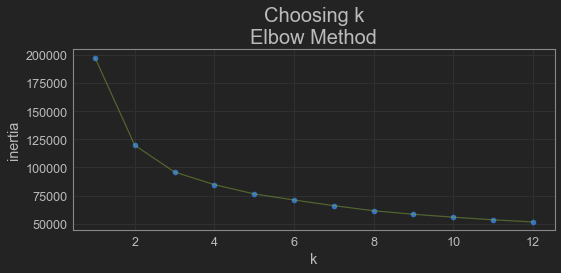

In [42]:
df_model = df.dropna(axis=0)[['CareerScr','CareerScr_norm','PosGrp','SsnScr','SsnScr_norm'] + normalization_exclude_list]
X_std = define_model(df_model)

plot_elbow_method(elbow_method(X_std, range(1,13)), range(1,13))

## Clustering Execution: Silhouette Analysis
- Another means of evaluating clusters is to compute the `silhouette coefficient`, which is a measure of intra-cluster datapoint similarity.

<br></br>
$$\dfrac{b_i-a_i}{max(b_i,a_i)}$$

<br></br>
- The silhouette coefficient for each datapoint is calculated as above, where:
 - $a_i$ is the mean distance between a datapoint and all other points in its cluster
 - $b_i$ is the mean distance between a datapoint and all points in the _neighboring_ clusters.
     
<br></br>
- Silhouette coefficients can be calculated at multiple levels:
 - Datapoint: Simply apply the formula above.
 - Cluster: The mean of the silhouette coefficients of all datapoints within a cluster.
 - Solution: The mean of the silhouette coefficients of all clusters for a $k$-cluster solution.

<br></br>
- Values can range from -1 to +1, indicating similarity or dissimilarity of datapoints within clusters.
 - Higher values indicate datapoints are well matched to other points in its cluster
 - Lower positive values indicate datapoints are poorly matched to other points in its cluster
 - Negative values indicate datapoints may match better match points in other clusters

## Clustering Execution: Silhouette Analysis Results

In [43]:
#df_model = df.dropna(axis=0)[['CareerScr','CareerScr_norm','PosGrp','SsnScr','SsnScr_norm'] + normalization_exclude_list]
#X_std = define_model(df_model)

umap_results = run_umap(X_std, 20, 0.1)

UMAP start...
UMAP completed in 20.824224 seconds!



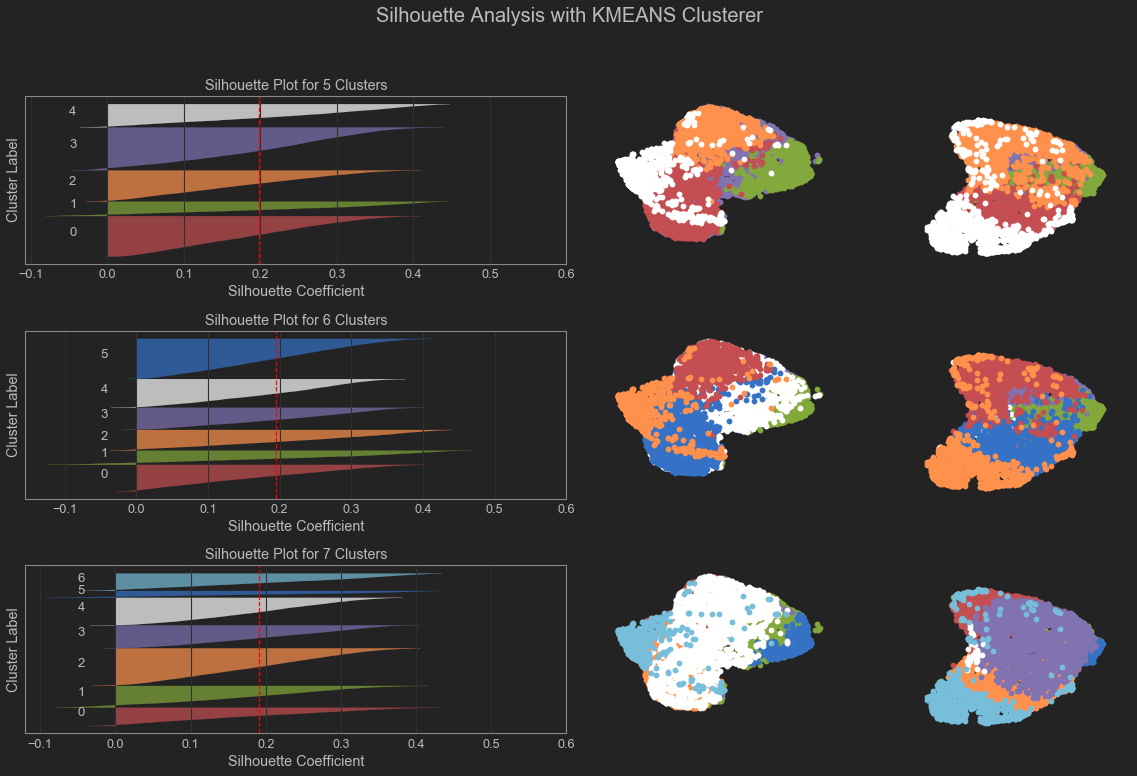

In [44]:
silhouette_analysis(X_std, range(5,8))

## Clustering Execution: Gaussian Mixture Model (GMM)
- The `Gaussian Mixture Model` (GMM) determines its clusters by modeling the target dataset as a set or mixture of Gaussian distributions.
- A Gaussian, or normal, distribution is a bell-shaped probability distribution that is symmetric around the mean. See sample plot below.
<center><img src='gaussian_dist2.png'></center>
<center>Sample Gaussian Distribution </center>

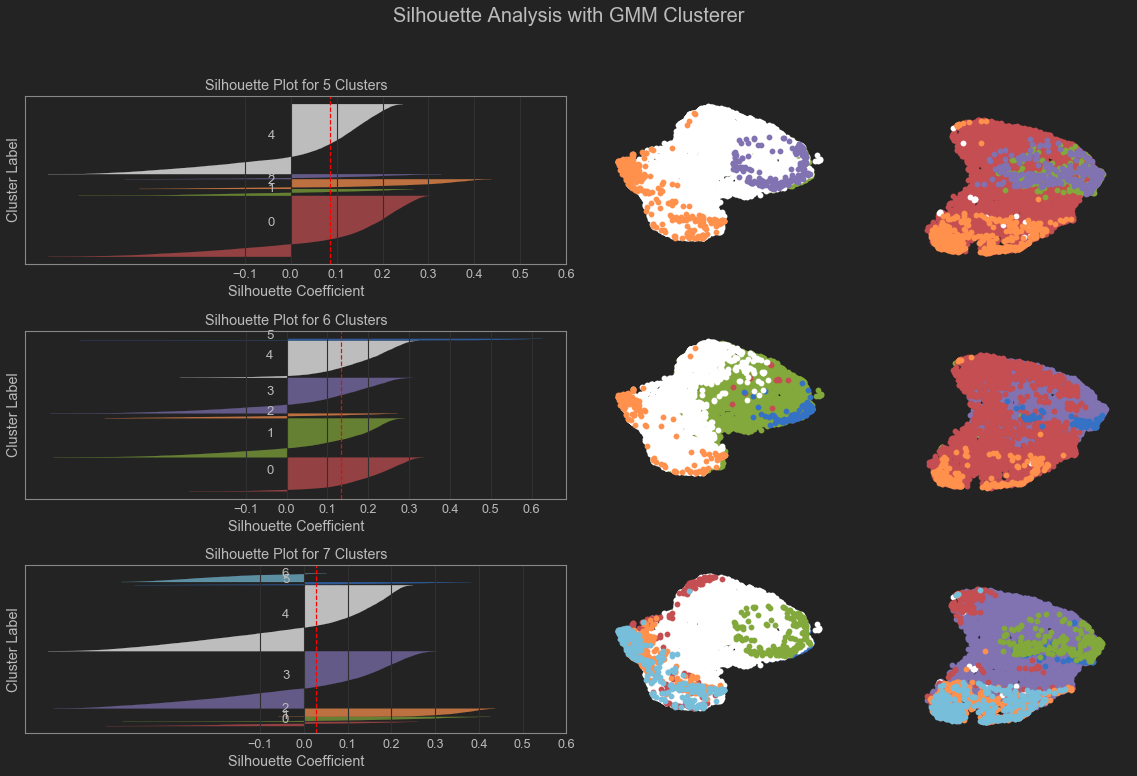

In [45]:
#umap_results = run_umap(X_std, 20, 0.1)
silhouette_analysis(X_std, range(5,8), 'GMM')

## Clustering Execution: Hierarchical Clustering
- `Hierarchical Clustering` algorithms build a tree-like hierarchy of clusters, either by combining or dividing clusters to build each level of the hierarchy.

<br></br>
- The bottoms-up approach, also known as `agglomerative clustering`, begins with $n$ clusters, where $n$ is the number of datapoints.
 - At each stage, the two most similar clusters are combined into one.
 - This is repeated until there is one cluster remaining.
 
<br></br>
- The tops-down approach, also known as `divisive clustering`, begins with 1 cluster.
 - At each stage, each cluster is divided into two, using an algorithm like KMeans to determine cluster assignment.
 - This is repeated until there are $n$ clusters, where $n$ is the number of datapoints.
 
<br></br>
- There are 3 methods to measure similarity of datapoints within a cluster.
 - `Euclidean distance` is the straight-line distance between two datapoints
 - `Manhattan distance` is the distance between two datapoints measured along axes at right angles.
 - `Cosine distance` is the cosine of the angle between two datapoints.
 
<br></br>
- There are 3 methods to determine how to select the representative elements of each cluster for similarity calculations
 - `Ward` method looks for spherical clusters that are cohesive inside and tends to find clusters of similar size.
 - `Complete` method uses the furthest datapoints (most dissimilar) to link clusters, resulting in relatively compact clusters.
 - `Average` method uses the centroids to link clusters, resulting in larger clusters varying shape and size.

### Clustering Execution: AGGLOMERATIVE-1 - Complete Linkage Method, Cosine Affinity

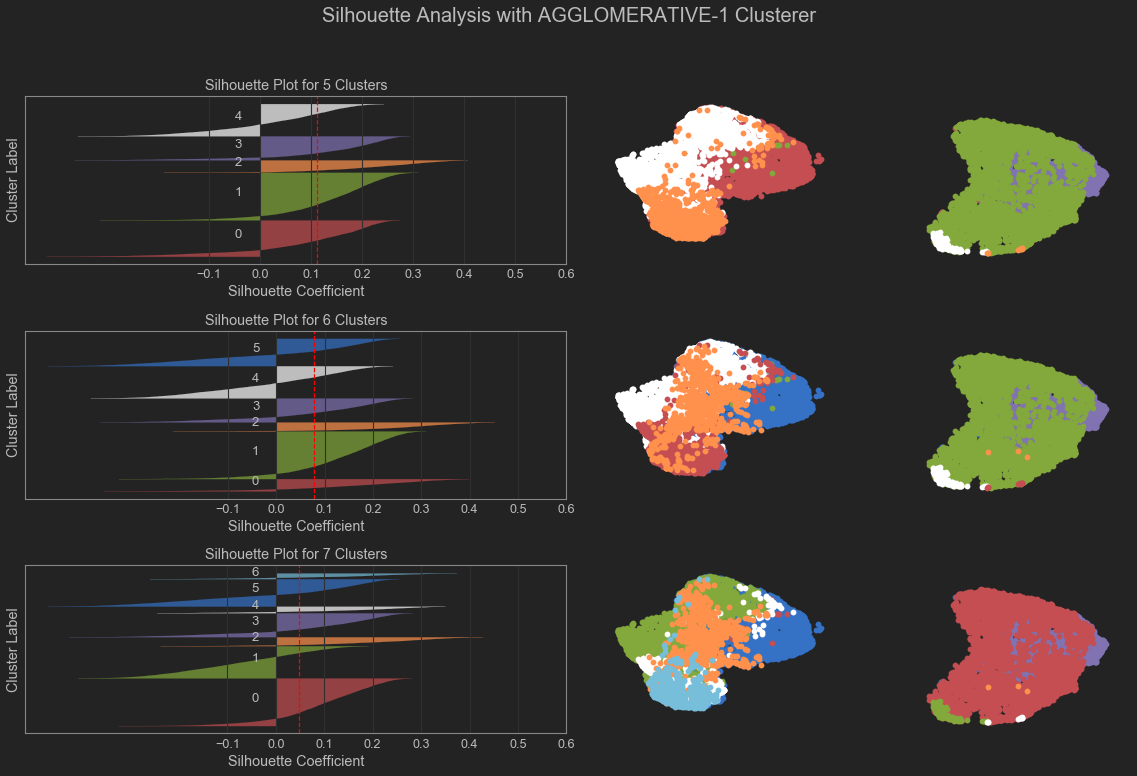

In [46]:
#umap_results = run_umap(X_std, 20, 0.1)
silhouette_analysis(X_std, range(5,8), 'AGGLOMERATIVE-1')

### Clustering Execution: AGGLOMERATIVE-2 - Ward Linkage Method, Euclidean Affinity

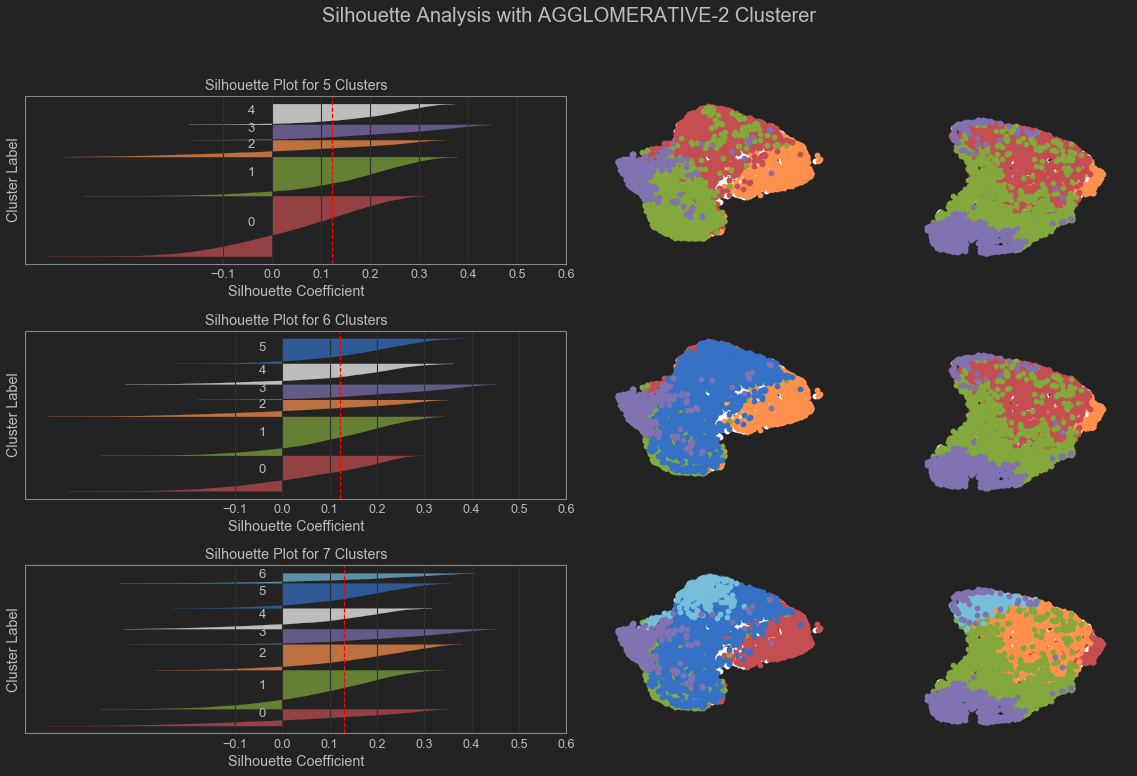

In [47]:
#umap_results = run_umap(X_std, 20, 0.1)
silhouette_analysis(X_std, range(5,8), 'AGGLOMERATIVE-2')

### Clustering Execution: AGGLOMERATIVE-3 - Average Linkage Method, Cosine Affinity

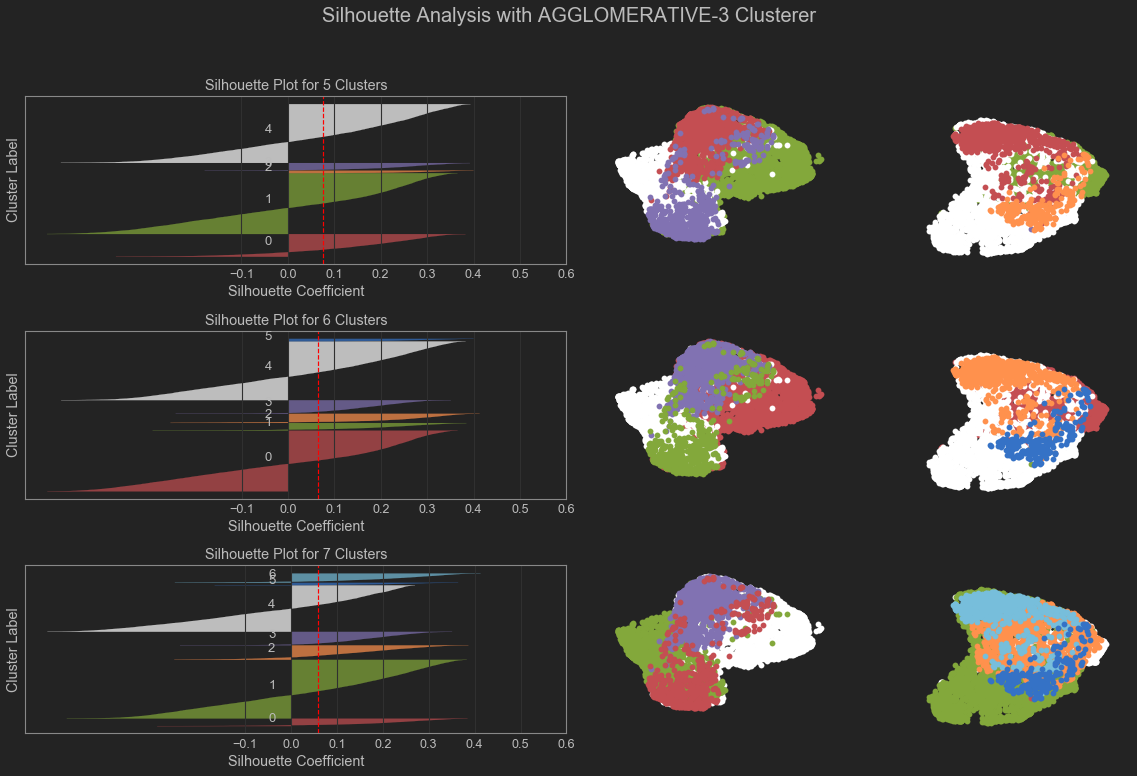

In [48]:
#umap_results = run_umap(X_std, 20, 0.1)
silhouette_analysis(X_std, range(5,8), 'AGGLOMERATIVE-3')

## Clustering Execution: Comparing Algorithms
Based on the silhouette coefficient averages for the different algorithms, we will move forward with the $k$-means 5-cluster solution.

In [49]:
algorithm_scores = {}
_K_ = 5

In [50]:
kmeans_cluster = KMeans(n_clusters=_K_, random_state=123).fit_predict(X_std)
algorithm_scores['kmeans'] = silhouette_score(X_std, kmeans_cluster, metric='euclidean')
print('--- kmeans finished executing ---')

--- kmeans finished executing ---


In [51]:
agg_cluster = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=_K_).fit_predict(X_std)
algorithm_scores['agg_comp_cos'] = silhouette_score(X_std, agg_cluster, metric='euclidean')
print('--- agglomerative complete/cosine finished executing ---')

agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=_K_).fit_predict(X_std)
algorithm_scores['agg_ward_euc'] = silhouette_score(X_std, agg_cluster, metric='euclidean')
print('--- agglomerative ward/euclidean finished executing ---')

agg_cluster = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=_K_).fit_predict(X_std)
algorithm_scores['agg_avg_cos'] = silhouette_score(X_std, agg_cluster, metric='euclidean')
print('--- agglomerative average/cosine finished executing ---')

--- agglomerative complete/cosine finished executing ---
--- agglomerative ward/euclidean finished executing ---
--- agglomerative average/cosine finished executing ---


In [52]:
gmm_cluster = GaussianMixture(n_components=_K_, random_state=123).fit_predict(X_std)
algorithm_scores['gmm'] = silhouette_score(X_std, gmm_cluster, metric='euclidean')
print('--- gmm finished executing ---')

--- gmm finished executing ---


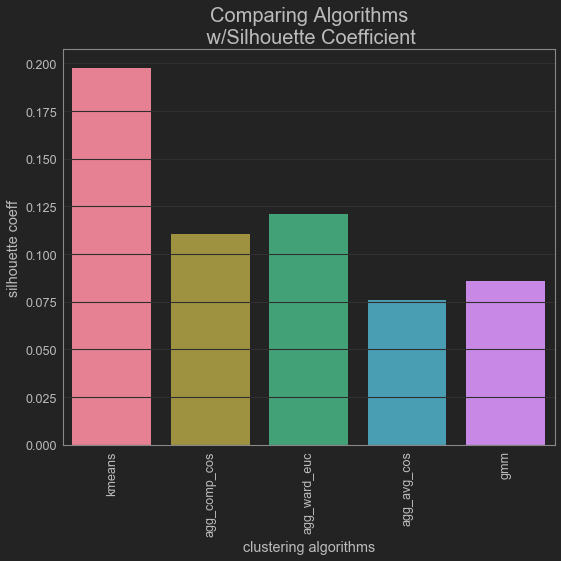

In [53]:
plt.rcParams['figure.figsize'] = (8,8)
sns.barplot(list(algorithm_scores.keys()), list(algorithm_scores.values()), palette='husl')
plt.xlabel('clustering algorithms')
plt.ylabel('silhouette coeff')
plt.xticks(rotation=90)
#plt.yticks(np.arange(0.25,0.6,0.05))
#plt.ylim(0.25,0.6)
plt.title('Comparing Algorithms\n w/Silhouette Coefficient', fontsize=20)
plt.tight_layout()
plt.show()

# CLUSTERS EVALUATION
---
<center><img src='abstract-bright-close-up-color-268460_resized.jpg'></center>
<center>Photo by Pixabay from Pexels</center>

## Clusters Evaluation: Derived features grouped by $k$-means clusters

In [54]:
df_eval = df.dropna(axis=0).copy()
df_eval['Kmeans_Clusters'] = kmeans_cluster
df_eval.Kmeans_Clusters.value_counts()

3    3977
0    3766
2    2887
4    2154
1    1340
Name: Kmeans_Clusters, dtype: int64

In [55]:
def rename_clusters(x):
    rename_map =  {
        '0':3,
        '1':0,
        '2':2,
        '3':1,
        '4':4
    }
    return rename_map[str(x)]

df_eval['Kmeans_Clusters_'] = df_eval.Kmeans_Clusters.apply(rename_clusters)
df_eval['Kmeans_Clusters'] = df_eval.Kmeans_Clusters_
df_eval = df_eval.drop(['Kmeans_Clusters_'], axis=1)

- Season scores: There are 5 distinct ranges, each correlating to a different cluster.
- Career scores: There are two groups of clusters with similar ranges.

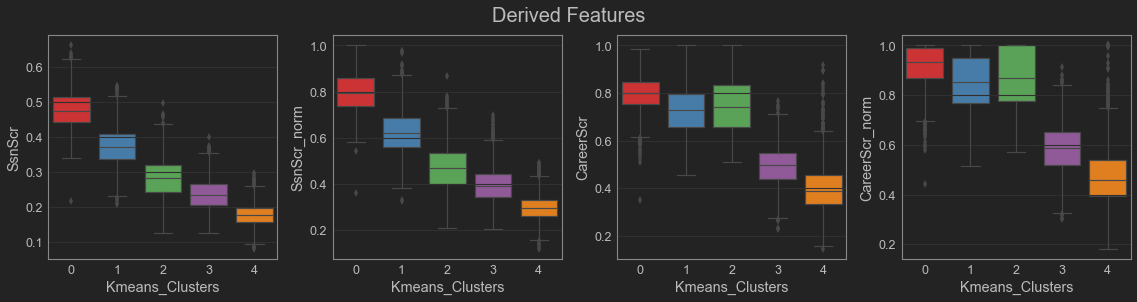

In [56]:
plt.rcParams['figure.figsize'] = (16,4)

count=1
for var in ['SsnScr','SsnScr_norm','CareerScr','CareerScr_norm']:
    plt.subplot(1,4,count)
    count += 1  
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='Set1')

plt.suptitle('Derived Features', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

- Cluster 0, These performances are not only the best of the season, but the best of the players' careers.
- Cluster 1, These players are performing near their career-best but are just below the season elites.
- Cluster 2, These players may be performing near their career peaks, but they are only average relative to other players.
- Cluster 3: These performances are below season averages and much worse than the players' career bests.
- Cluster 4: These performances are the worst of the season, and the worst of the players careers.

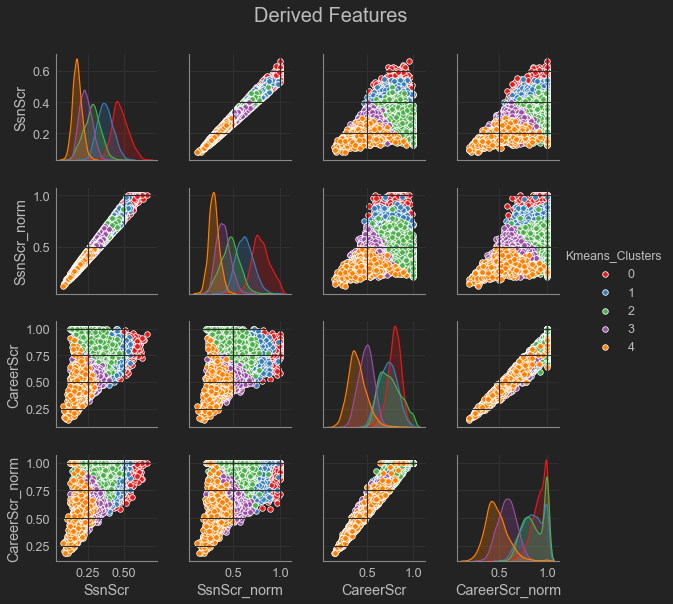

In [57]:
sns.pairplot(data=df_eval, vars=['SsnScr','SsnScr_norm','CareerScr','CareerScr_norm'], hue='Kmeans_Clusters', palette='Set1', height=2)
plt.suptitle('Derived Features', fontsize=20, y=1.05)

plt.show()

## Clusters Evaluation: Basic metrics grouped by $k$-means clusters

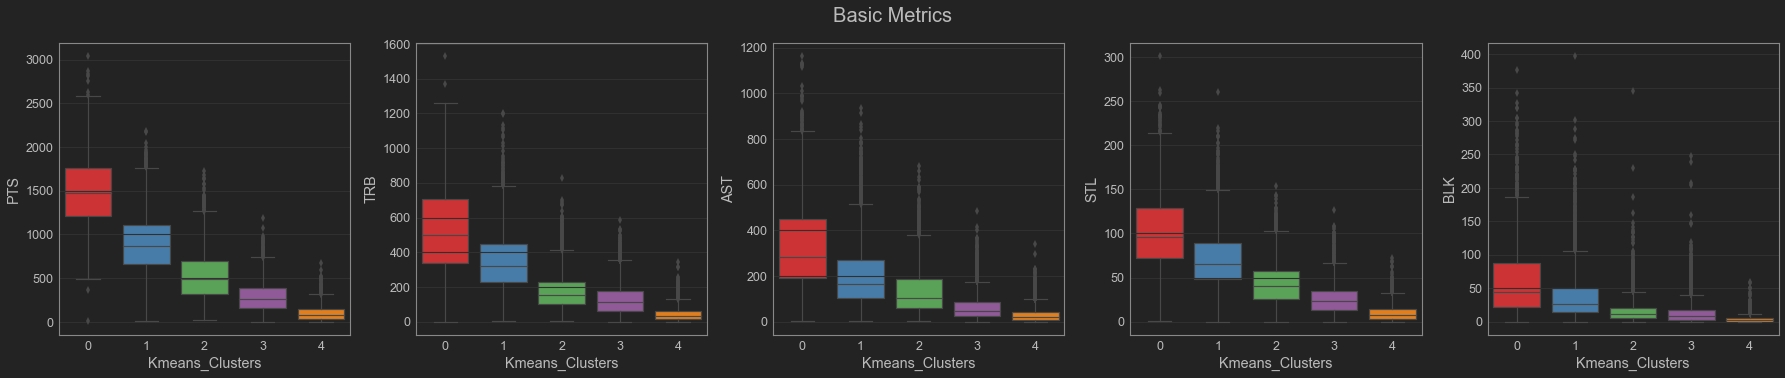

In [58]:
plt.rcParams['figure.figsize'] = (25,5)

count=1
for var in ['PTS','TRB','AST','STL','BLK']:
    plt.subplot(1,5,count)
    count += 1
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='Set1')
    
plt.suptitle('Basic Metrics', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

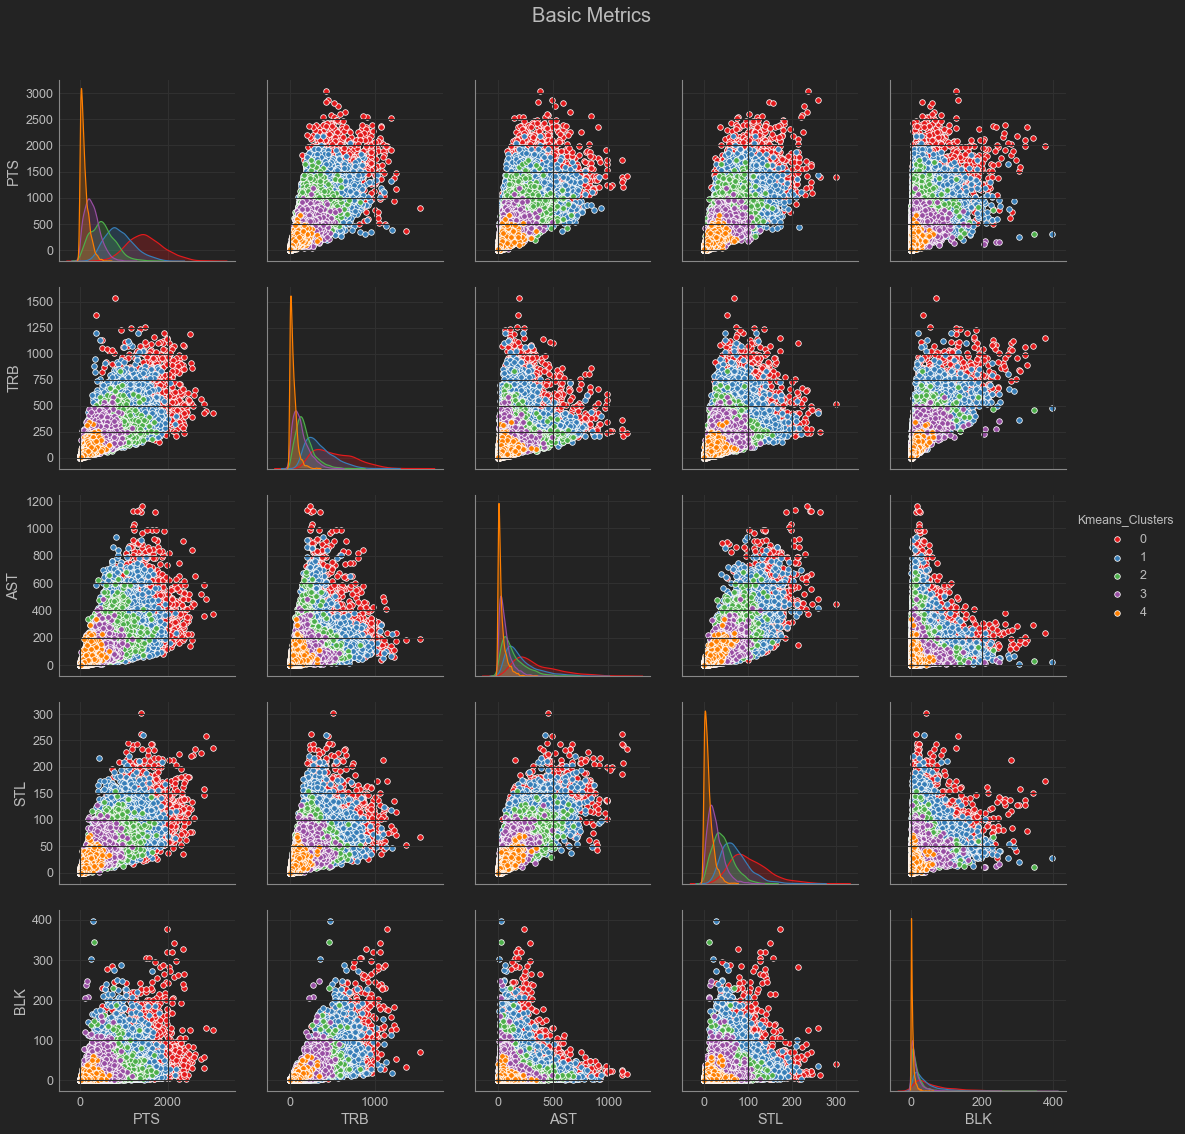

In [59]:
sns.pairplot(data=df_eval, vars=['PTS','TRB','AST','STL','BLK'], hue='Kmeans_Clusters', palette='Set1', height=3)
plt.suptitle('Basic Metrics', fontsize=20, y=1.05)
plt.show()

## Clusters Evaluation: Shooting percentages grouped by $k$-means clusters

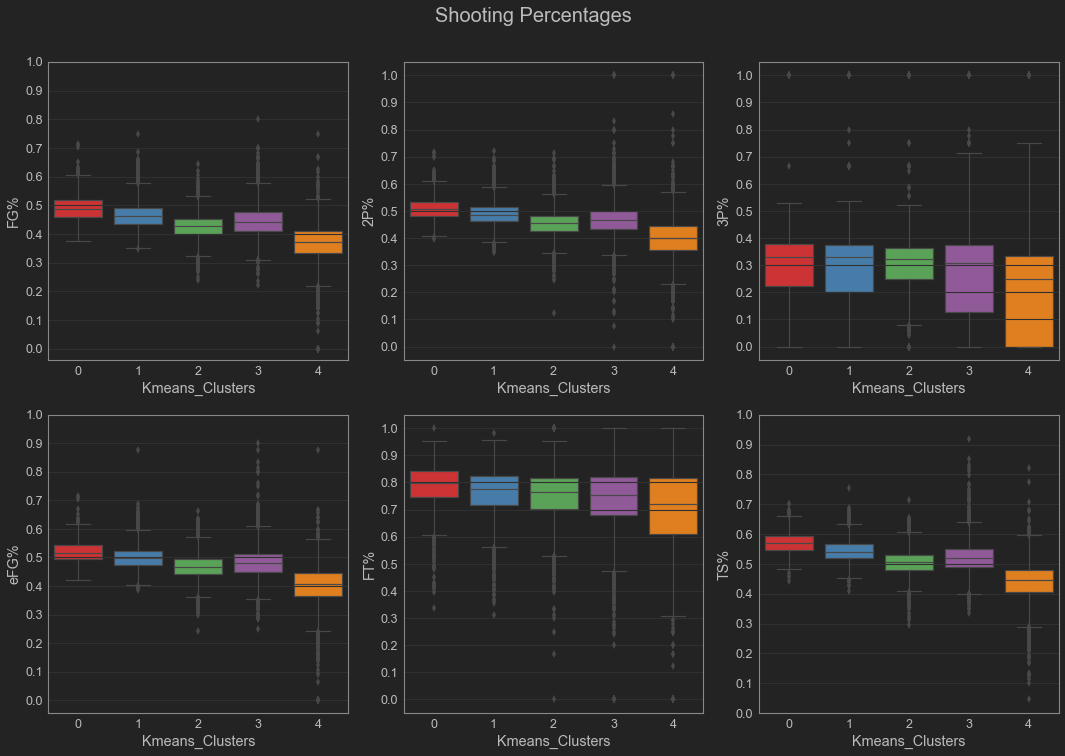

In [60]:
plt.rcParams['figure.figsize'] = (15,10)

count=1
for var in ['FG%','2P%','3P%','eFG%','FT%','TS%',]:
    plt.subplot(2,3,count)
    count += 1
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='Set1')
    plt.yticks(np.arange(0,1.1,0.1))
    
plt.suptitle('Shooting Percentages', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

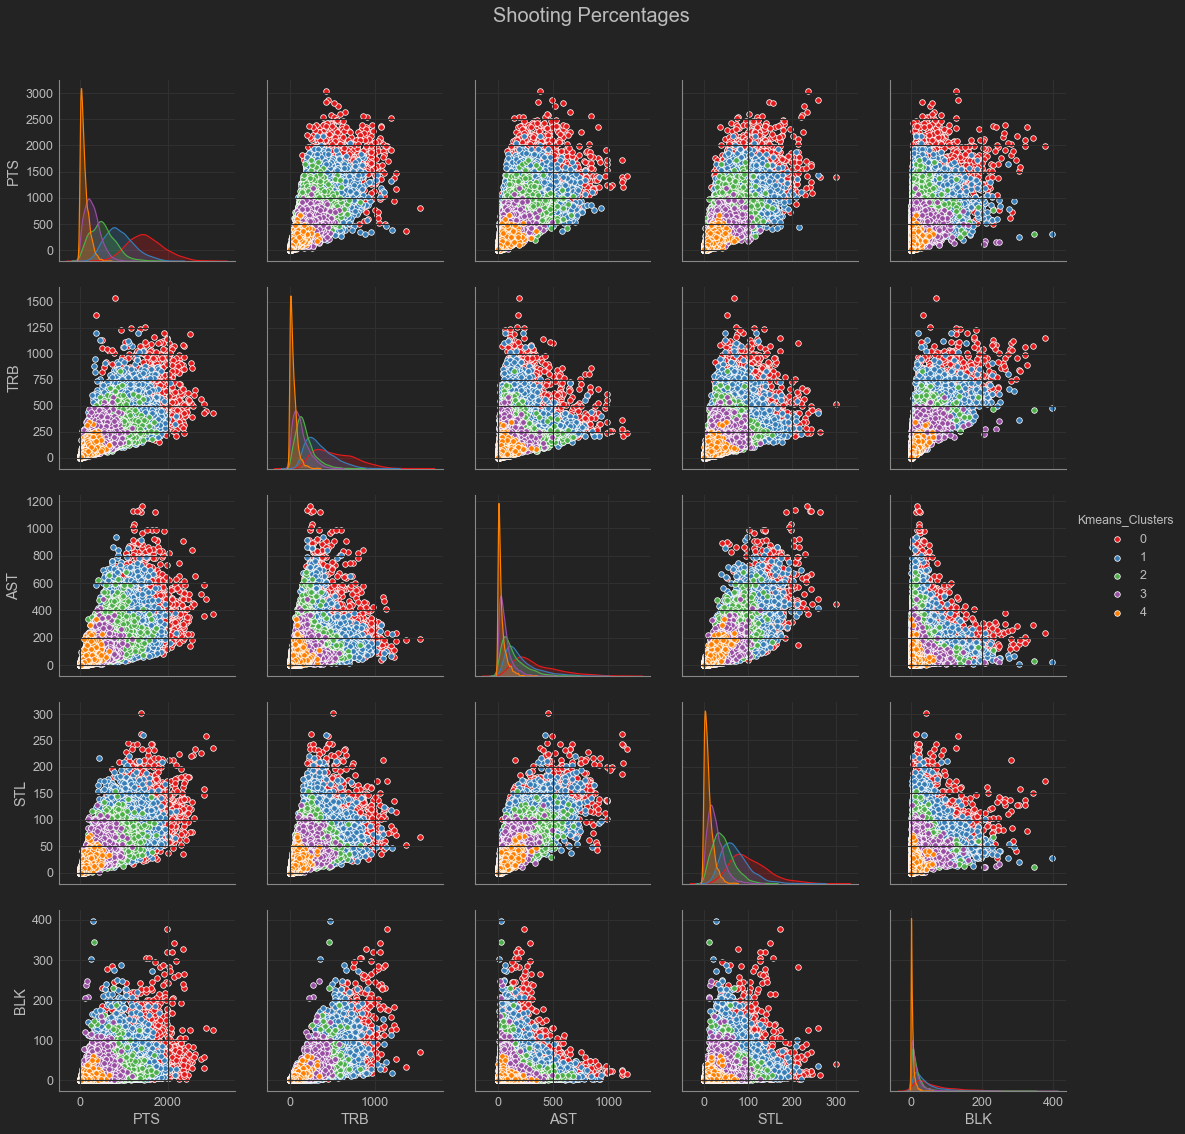

In [61]:
sns.pairplot(data=df_eval, vars=['PTS','TRB','AST','STL','BLK'], hue='Kmeans_Clusters', palette='Set1', height=3)
plt.suptitle('Shooting Percentages', fontsize=20, y=1.05)
plt.show()

## Clusters Evaluation: Win shares grouped by $k$-means clusters

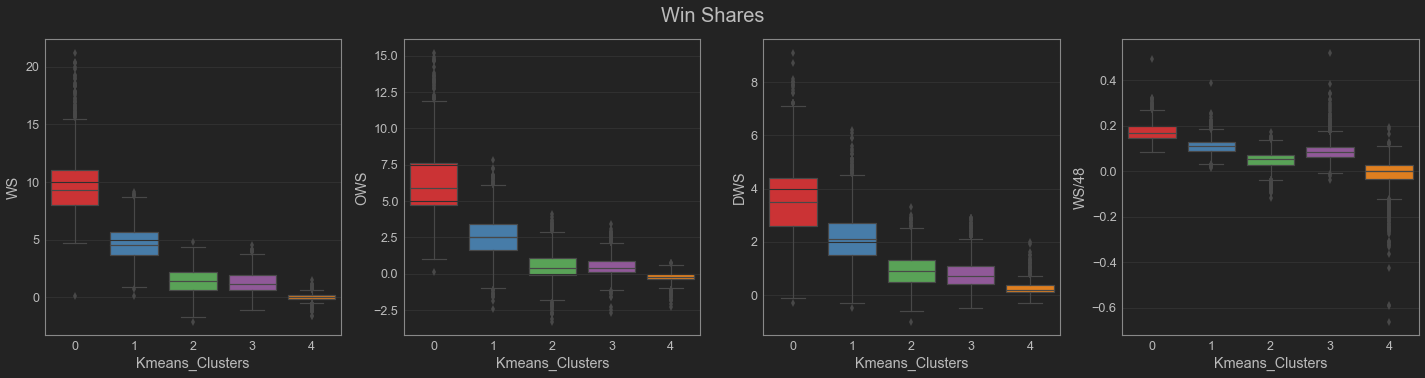

In [62]:
plt.rcParams['figure.figsize'] = (20,5)

count=1
for var in ['WS','OWS','DWS','WS/48']:
    plt.subplot(1,4,count)
    count += 1
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='Set1')

plt.suptitle('Win Shares', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

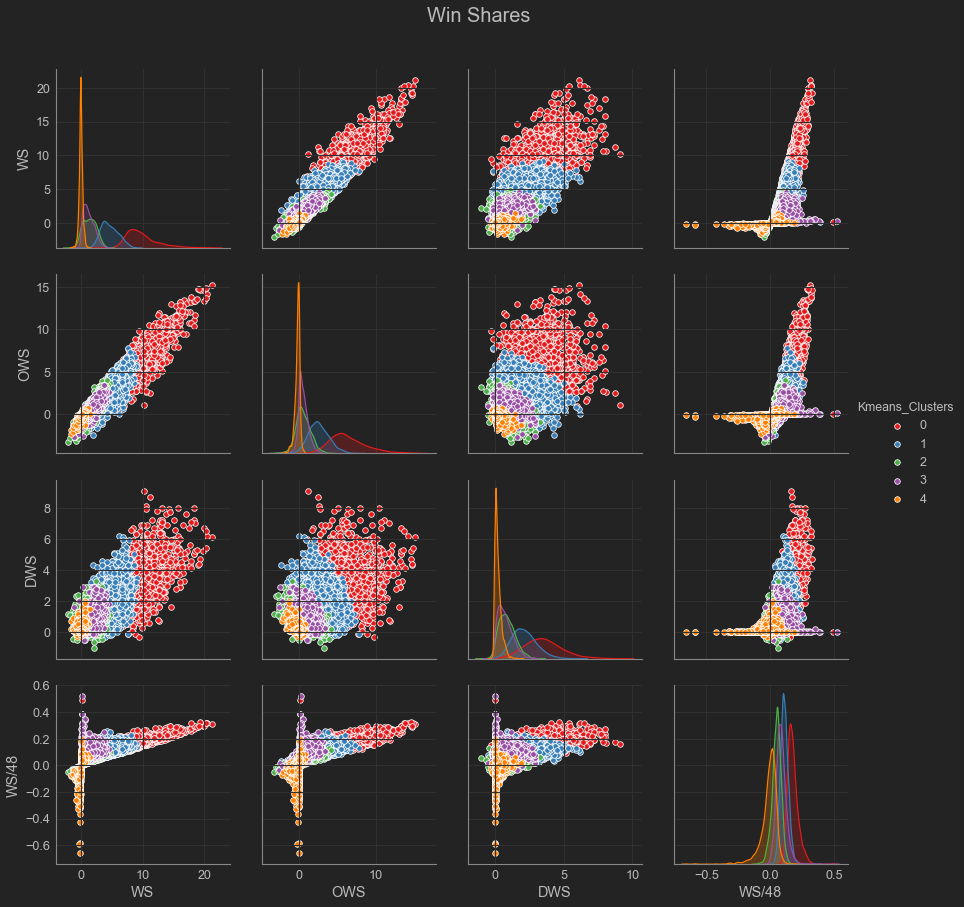

In [63]:
sns.pairplot(data=df_eval, vars=['WS','OWS','DWS','WS/48'], hue='Kmeans_Clusters', palette='Set1', height=3)
plt.suptitle('Win Shares', fontsize=20, y=1.05)
plt.show()

## Clusters Evaluation: Advanced metrics grouped by $k$-means clusters

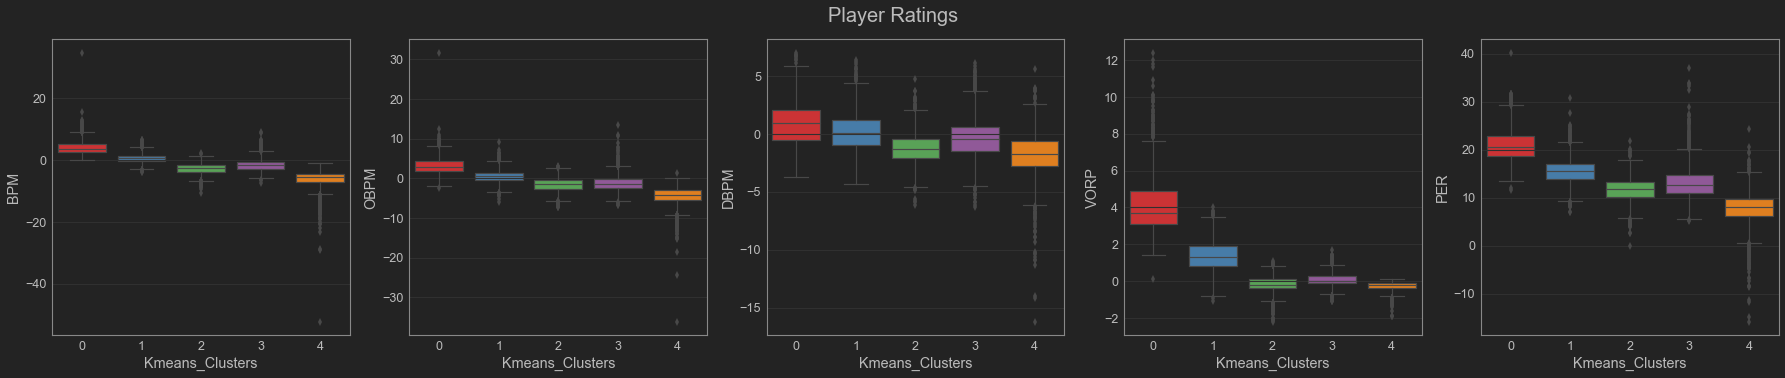

In [64]:
plt.rcParams['figure.figsize'] = (25,5)

count=1
for var in ['BPM','OBPM','DBPM','VORP','PER']:
    plt.subplot(1,5,count)
    count += 1  
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='Set1')

plt.suptitle('Player Ratings', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

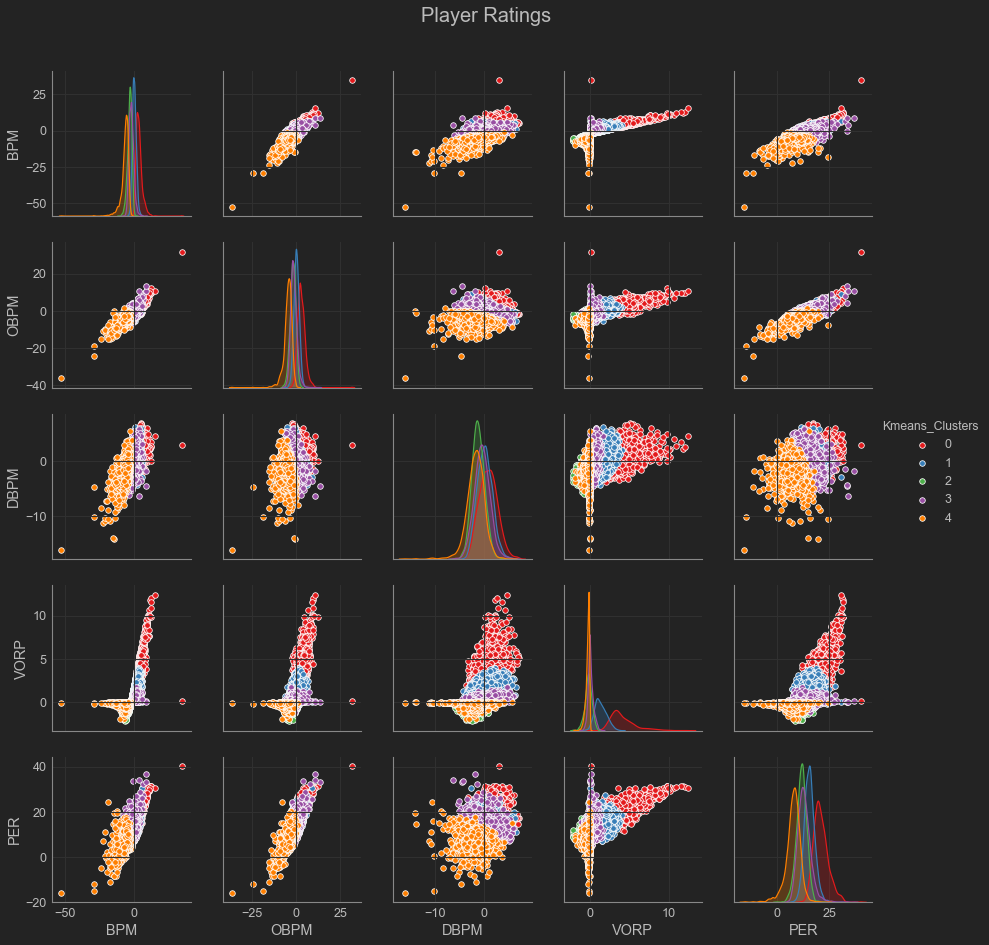

In [65]:
sns.pairplot(data=df_eval, vars=['BPM','OBPM','DBPM','VORP','PER'], hue='Kmeans_Clusters', palette='Set1', height=2.5)
plt.suptitle('Player Ratings', fontsize=20, y=1.05)
plt.show()

## Clusters Evaluation: Which NBA seasons are the greatest of all time?
- Each row in the table below breaks down that year's distribution of players among the 5 clusters.
- Sorting by count, these are the top 3 years with the most players in cluster 0:
 1. 2008
 2. 1997
 3. 2001
- Sorting by percentage, these are the top 3 years with the highest percentage of players in cluster 0:
 1. 1983
 2. 1984
 3. 1985

In [78]:
df_pvt = pd.pivot_table(df_eval[['Year','Kmeans_Clusters','Player']], index='Year', columns='Kmeans_Clusters', aggfunc=lambda x: len(x.unique()))
df_pvt['Total'] = df_pvt.sum(axis=1)
df_pvt.columns = ['cl0','cl1','cl2','cl3','cl4','Total']
df_pvt.reset_index(inplace=True)

df_pvt['cl0%'] = df_pvt.cl0 / df_pvt.Total
df_pvt['cl1%'] = df_pvt.cl1 / df_pvt.Total
df_pvt['cl2%'] = df_pvt.cl2 / df_pvt.Total
df_pvt['cl3%'] = df_pvt.cl3 / df_pvt.Total
df_pvt['cl4%'] = df_pvt.cl4 / df_pvt.Total

df_pvt = df_pvt.sort_values(by=['cl0','cl0%'], ascending=False).reset_index().drop(['index'], axis=1)
drop_indexes = df_pvt[df_pvt.Total < 100].index
df_pvt = df_pvt.drop(drop_indexes, axis=0).reset_index().drop(['index'], axis=1)

df_pvt.round(4).head(10)

Year   cl0    cl1   cl2    cl3   cl4  Total    cl0%    cl1%    cl2%  \
0  2008  47.0  106.0  69.0   82.0  64.0  368.0  0.1277  0.2880  0.1875   
1  1997  46.0   96.0  63.0   95.0  54.0  354.0  0.1299  0.2712  0.1780   
2  2001  44.0   89.0  62.0  105.0  54.0  354.0  0.1243  0.2514  0.1751   
3  2004  44.0   97.0  67.0  102.0  58.0  368.0  0.1196  0.2636  0.1821   
4  2006  43.0  102.0  76.0   73.0  67.0  361.0  0.1191  0.2825  0.2105   
5  2003  42.0  103.0  70.0   73.0  48.0  336.0  0.1250  0.3065  0.2083   
6  2007  42.0  108.0  73.0   88.0  48.0  359.0  0.1170  0.3008  0.2033   
7  2005  41.0  112.0  76.0   90.0  64.0  383.0  0.1070  0.2924  0.1984   
8  1998  40.0  100.0  66.0   90.0  61.0  357.0  0.1120  0.2801  0.1849   
9  2000  39.0  108.0  53.0   91.0  48.0  339.0  0.1150  0.3186  0.1563   

     cl3%    cl4%  
0  0.2228  0.1739  
1  0.2684  0.1525  
2  0.2966  0.1525  
3  0.2772  0.1576  
4  0.2022  0.1856  
5  0.2173  0.1429  
6  0.2451  0.1337  
7  0.2350  0.1671  
8  0.2521  0.1709  
9  0.2684  0.1416

## Clusters Evaluation: Which NBA seasons are the greatest of all time (part 2)?
- The table below shows the means of SsnScr_norm within each cluster.
- Ranking with this method produces the following top 3 years:
 1. 1999
 2. 1984
 3. 1982

In [67]:
df_pvt = pd.pivot_table(df_eval[['Year','Kmeans_Clusters','SsnScr_norm']], index='Year', columns='Kmeans_Clusters', aggfunc='mean')
df_pvt.columns = ['cl0','cl1','cl2','cl3','cl4']
df_pvt.reset_index(inplace=True)

df_pvt = df_pvt.sort_values(by=['cl0'], ascending=False).reset_index().drop(['index'], axis=1)
drop_indexes = df_pvt[df_pvt.Year.isin(['1980','1981'])].index
df_pvt = df_pvt.drop(drop_indexes, axis=0).reset_index().drop(['index'], axis=1)

df_pvt.round(4).head(10)

Year     cl0     cl1     cl2     cl3     cl4
0  1999  0.9070  0.7202  0.5587  0.4671  0.3224
1  1984  0.8714  0.6962  0.5237  0.4496  0.3360
2  1992  0.8563  0.6795  0.5110  0.3949  0.3263
3  1983  0.8419  0.6698  0.5313  0.4575  0.3348
4  1997  0.8346  0.6545  0.5016  0.4066  0.3195
5  2001  0.8345  0.6434  0.4900  0.4156  0.3152
6  2011  0.8251  0.6302  0.5001  0.4039  0.3041
7  2007  0.8197  0.6452  0.4837  0.4220  0.3150
8  1998  0.8125  0.6468  0.5084  0.4104  0.2939
9  1987  0.8091  0.6352  0.4827  0.4027  0.2975

## Clusters Evaluation: Which are the greatest NBA players of all time?
- Each row in the table below breaks down that players's distribution of seasons among the 5 clusters.
- The table, sorted by the cluster 0 column, is a ranking of the players by the number of seasons in cluster 0.
- This table shows which players have performed consistently excellent throughout their careers.

In [68]:
df_pvt = pd.pivot_table(df_eval[['Year','Kmeans_Clusters','Player']], index='Player', columns='Kmeans_Clusters', aggfunc=lambda x: len(x.unique()))
df_pvt['Total'] = df_pvt.sum(axis=1)
df_pvt.columns = ['cl0','cl1','cl2','cl3','cl4','Total']
df_pvt.reset_index(inplace=True)
df_pvt['cl0+cl1'] = df_pvt.cl0 + df_pvt.cl1

df_pvt = df_pvt.sort_values(by=['cl0','cl1','cl0+cl1','cl2','cl3','cl4'], ascending=False).reset_index().drop(['index'], axis=1)
df_pvt.round(4).head(20)

Player   cl0  cl1  cl2  cl3  cl4  Total  cl0+cl1
0        Tim Duncan  17.0  2.0  NaN  NaN  NaN   19.0     19.0
1       Karl Malone  16.0  3.0  NaN  NaN  NaN   19.0     19.0
2     John Stockton  16.0  2.0  NaN  1.0  NaN   19.0     18.0
3      LeBron James  15.0  1.0  NaN  NaN  NaN   16.0     16.0
4   Charles Barkley  15.0  NaN  NaN  1.0  NaN   16.0      NaN
5     Kevin Garnett  14.0  4.0  NaN  3.0  NaN   21.0     18.0
6     Dirk Nowitzki  14.0  4.0  NaN  2.0  1.0   21.0     18.0
7       Kobe Bryant  14.0  2.0  1.0  2.0  1.0   20.0     16.0
8     Clyde Drexler  14.0  1.0  NaN  1.0  NaN   16.0     15.0
9         Pau Gasol  13.0  5.0  NaN  1.0  NaN   19.0     18.0
10    Reggie Miller  13.0  5.0  NaN  NaN  NaN   18.0     18.0
11      Paul Pierce  13.0  4.0  NaN  1.0  1.0   19.0     17.0
12       Chris Paul  13.0  1.0  NaN  NaN  NaN   14.0     14.0
13       Jason Kidd  12.0  7.0  NaN  1.0  NaN   20.0     19.0
14        Ray Allen  12.0  7.0  NaN  NaN  NaN   19.0     19.0
15      Gary Payton  12.0  3.0  NaN  3.0  2.0   20.0     15.0
16  Hakeem Olajuwon  12.0  2.0  NaN  2.0  NaN   16.0     14.0
17   Michael Jordan  11.0  2.0  NaN  2.0  NaN   15.0     13.0
18       Larry Bird  11.0  1.0  NaN  NaN  NaN   12.0     12.0
19   David Robinson  11.0  NaN  NaN  NaN  NaN   11.0      NaN

## Clusters Evaluation: Which are the greatest NBA players of all time (part 2)?
- The table below ranks players by the average of the two derived features, SsnScr_norm and CareerScr_norm.
- This table indicates which players are consistently excellent relative to both their peers and their career best.
- The table has been filtered by only including those players who have played more than the average number of season (7).

In [69]:
df_years = df_eval.groupby('Player').count().Year.reset_index()
df_years.mean()

Year    7.646995
dtype: float64

In [70]:
df_tmp = df_eval.groupby('Player').mean()[['SsnScr_norm','CareerScr_norm']].reset_index()
df_tmp['Scr_norm_avg'] = df_tmp[['SsnScr_norm','CareerScr_norm']].mean(axis=1)

df_tmp = pd.concat([df_tmp,df_years.Year], axis=1)
df_tmp[df_tmp.Year > 7].sort_values(by=['Scr_norm_avg'], ascending=False).reset_index().drop(['index'], axis=1).head(20)

Player  SsnScr_norm  CareerScr_norm  Scr_norm_avg  Year
0        LeBron James     0.924398        0.898087      0.911242    16
1          Larry Bird     0.906724        0.901268      0.903996    12
2         Karl Malone     0.905918        0.841445      0.873681    19
3      David Robinson     0.928693        0.814745      0.871719    11
4    Shaquille O'Neal     0.866426        0.849410      0.857918    11
5        Kevin Durant     0.850468        0.862811      0.856640    12
6       Dwight Howard     0.843399        0.864491      0.853945    14
7      Michael Jordan     0.866556        0.837489      0.852022    15
8     Charles Barkley     0.838645        0.834318      0.836482    16
9       Magic Johnson     0.813691        0.857351      0.835521    11
10       James Harden     0.862898        0.806527      0.834713    10
11         Jack Sikma     0.776379        0.886941      0.831660    10
12  Russell Westbrook     0.872422        0.783171      0.827797    11
13       Isiah Thomas     0.777238        0.875990      0.826614    13
14         Tim Duncan     0.838855        0.810966      0.824910    19
15      Blake Griffin     0.764725        0.868725      0.816725     9
16      Stephen Curry     0.796803        0.828175      0.812489    10
17      Klay Thompson     0.705850        0.916288      0.811069     8
18         Marc Gasol     0.716460        0.903700      0.810080    11
19    Hakeem Olajuwon     0.838301        0.779937      0.809119    16

# FINAL THOUGHTS
---

<br></br>
## Summary
The results of this project will likely not settle any arguments regarding who is the greatest NBA player. In fact, several of the rankings in previous slides may ignite new fiery discussions! What this data _has_ done is provide yet another way to examine a player's performance. Rather than simply evaluating a player by their points, rebounds or any other singular metric, this project analyzes a player's overall performance across all metrics and comparing the resulting composite scores against their peers and their own career. This project also shows which NBA seasons and player performances are most similar to one another across the long history of the NBA. This can be powerful in providing a retrospective on a league that has been around for almost 75 years.Basketball has always been my favorite sport to watch and play, so I hope this project can serve as a guide to not only fans of the game but also fans of the statistics behind the game.

<br></br>
## Next steps

<br></br>
#### Increase observations in model
Unfortunately, not all of the variables in the dataset were available for every observation. Several of the variables were not collected or calculated during the earlier years of the league. Since all of the variables were included in the model in one way or another, observations prior to 1982 were dropped. In the future, I would like to explore a model using only variables that were available for all observations, and discover how this affects clustering.

<br></br>
#### Improve intra-cluster similarity
Additionally, the silhouette coefficient for the model used was 0.2, indicating a lot of room for improvement. The lower similarity score results in clusters with overlap and outliers. This can be seen in the boxplots in which there are long tails on either side of the median. In the future, I would like to explore ways to improve the silhouette coefficient, perhaps by introducing interaction variables, or excluding more variables from the normalization and feature derivation process.

# ADDITIONAL WORK
---

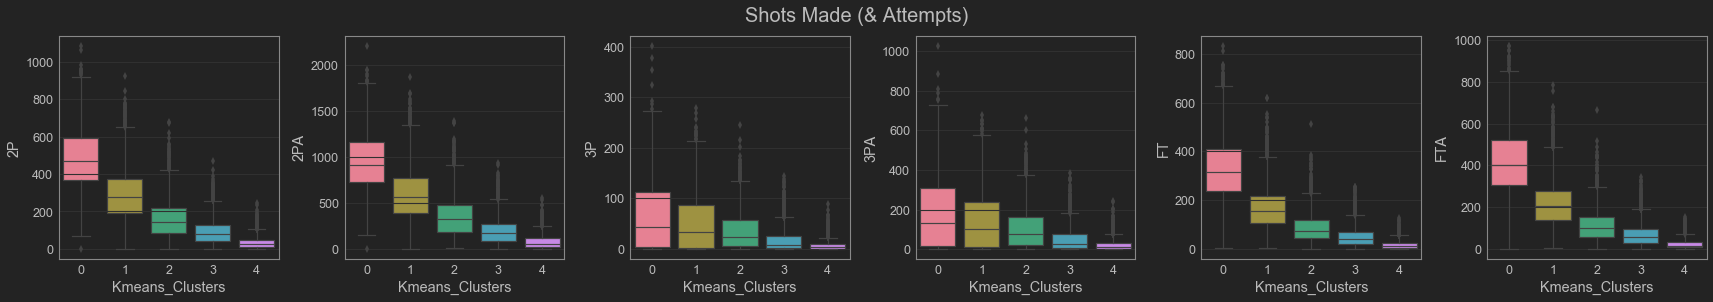

In [71]:
plt.rcParams['figure.figsize'] = (24,4)

count=1
for var in ['2P','2PA','3P','3PA','FT','FTA']:
    plt.subplot(1,6,count)
    count += 1
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='husl')
    
plt.suptitle('Shots Made (& Attempts)', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

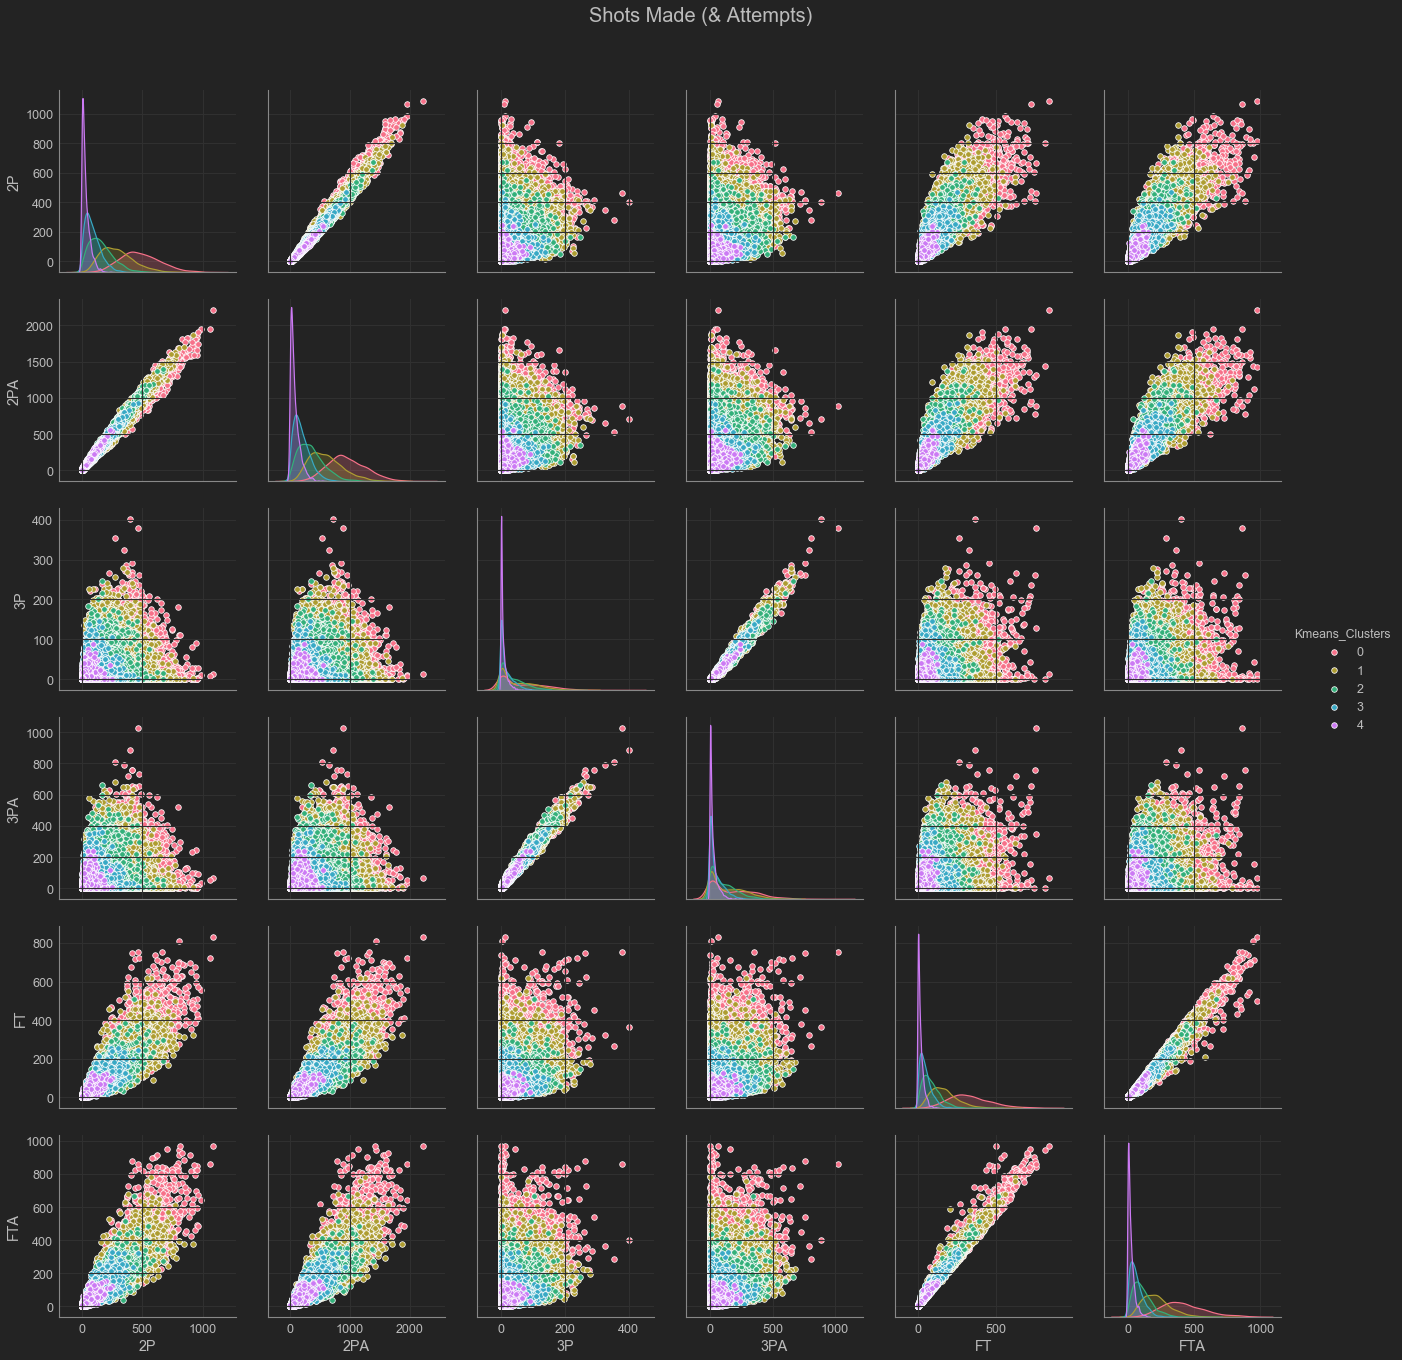

In [72]:
sns.pairplot(data=df_eval, vars=['2P','2PA','3P','3PA','FT','FTA'], hue='Kmeans_Clusters', palette='husl', height=3)
plt.suptitle('Shots Made (& Attempts)', fontsize=20, y=1.05)
plt.show()

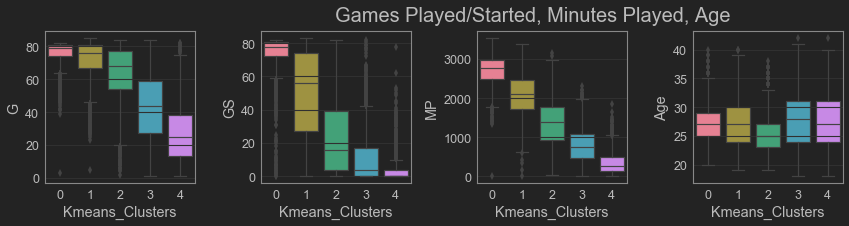

In [73]:
plt.rcParams['figure.figsize'] = (15,3)

count=1
for var in ['G','GS','MP','Age']:
    plt.subplot(1,5,count)
    count += 1
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='husl')
    
plt.suptitle('Games Played/Started, Minutes Played, Age', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

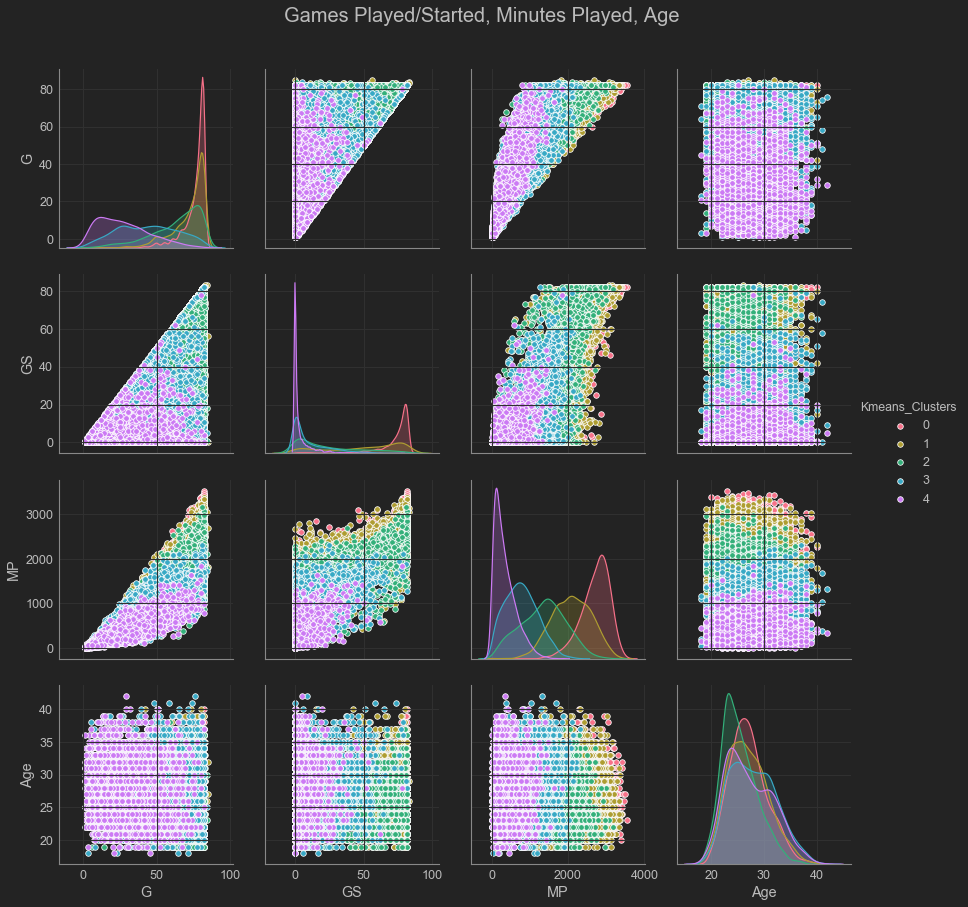

In [74]:
sns.pairplot(data=df_eval, vars=['G','GS','MP','Age'], hue='Kmeans_Clusters', palette='husl', height=3)
plt.suptitle('Games Played/Started, Minutes Played, Age', fontsize=20, y=1.05)
plt.show()

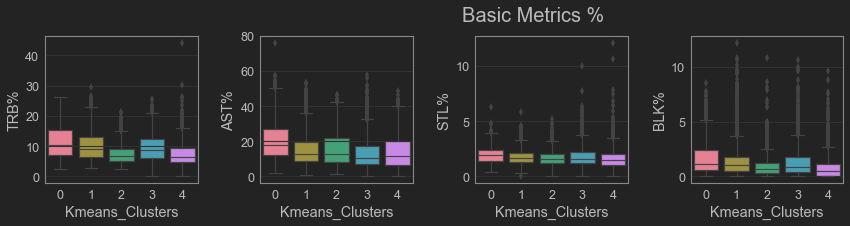

In [75]:
plt.rcParams['figure.figsize'] = (15,3)

count=1
for var in ['TRB%','AST%','STL%','BLK%']:
    plt.subplot(1,5,count)
    count += 1
    sns.boxplot(data=df_eval, x='Kmeans_Clusters', y=var, palette='husl')
    
plt.suptitle('Basic Metrics %', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

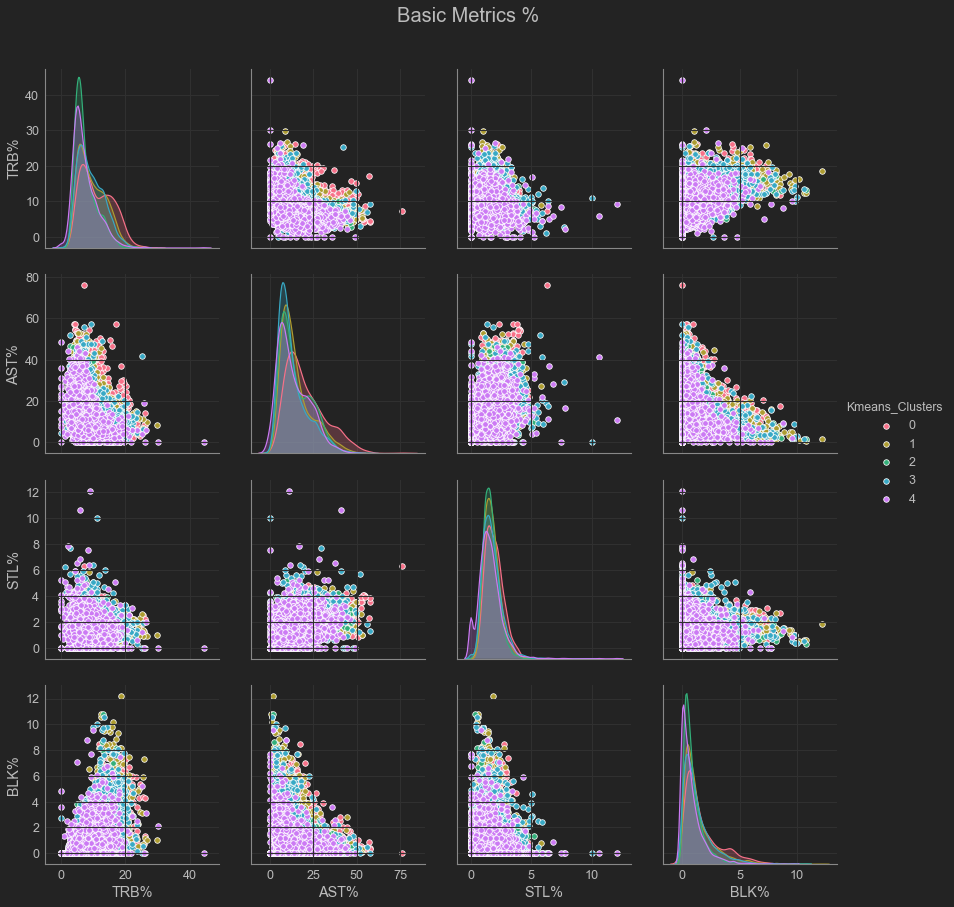

In [76]:
sns.pairplot(data=df_eval, vars=['TRB%','AST%','STL%','BLK%'], hue='Kmeans_Clusters', palette='husl', height=3)
plt.suptitle('Basic Metrics %', fontsize=20, y=1.05)
plt.show()